In [1]:
# Imports
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


## PreProcessing Data

In [2]:
# file path - this for linux windows you will need "//"
f_path = "cardio_train.csv"

df = pd.read_csv(f_path,sep = ';',index_col=0)

In [3]:
df2 = df[['age','gender','height','weight','smoke']]
df2['gender'] = df2['gender'].replace({1:0,2:1})

In [4]:
'''
normalization of the data
'''
df2['age'] = df['age'].apply(lambda x: x/360)

In [5]:
'''
0 - female
1 - male
'''
df2,df2['gender'].value_counts()

(             age  gender  height  weight  smoke
 id                                             
 0      51.091667       1     168    62.0      0
 1      56.188889       0     156    85.0      0
 2      52.380556       0     165    64.0      0
 3      48.952778       1     169    82.0      0
 4      48.538889       0     156    56.0      0
 ...          ...     ...     ...     ...    ...
 99993  53.444444       1     168    76.0      1
 99995  62.780556       0     158   126.0      0
 99996  52.961111       1     183   105.0      0
 99998  62.308333       0     163    72.0      0
 99999  57.055556       0     170    72.0      0
 
 [70000 rows x 5 columns],
 0    45530
 1    24470
 Name: gender, dtype: int64)

In [6]:
'''
split the dataset into training_set 50K
and testing_set 20K
'''
training_set = df2.head(50000)
testing_set = df2.tail(20000)

In [7]:
testing_set

,age,gender,height,weight,smoke
id,,,,,
71369,52.525000,1,176,72.0,0
71370,64.661111,0,145,68.0,0
71371,58.800000,1,159,66.0,0
71372,56.608333,0,165,82.0,0
71373,53.338889,1,175,80.0,0
...,...,...,...,...,...
99993,53.444444,1,168,76.0,1
99995,62.780556,0,158,126.0,0
99996,52.961111,1,183,105.0,0


In [72]:
features = 4
alpha = 0.0001
hidden_layer_node = 10
eps = 1e-12

X = tf.placeholder(tf.float32,[None,features])
Y = tf.placeholder(tf.float32,[None,1])

#matrix, dimensions of W  
W1 = tf.Variable(tf.truncated_normal([features,hidden_layer_node],stddev = 0.1))
#vector
b1 = tf.Variable(tf.constant(0.1,shape=[hidden_layer_node]))
#
Z1 = tf.add(tf.matmul(X,W1),b1)
#ReLu activation layer
a1 = tf.nn.relu(Z1)
# 50 examples with 2 features --> 50 examples with 10 features
W2 = tf.Variable(tf.truncated_normal([hidden_layer_node,1],stddev = 0.1))
#
b2 = tf.Variable(0.)
#
Z2 = tf.matmul(a1,W2) + b2
#
sigmoid = 1 / (1.0 + tf.exp(-Z2))
#
loss = tf.reduce_mean(-(Y* tf.log(sigmoid) + (1-Y)*tf.log(1-sigmoid)))
#
update = tf.train.GradientDescentOptimizer(alpha).minimize(loss)

In [ ]:

data_x = np.array([[2,32], [25,1.2], [5,25.2], [23,2], [56,8.5], [60,60], [3,3], [46,53], [3.5,2]])
data_y = np.array([[1], [1], [1], [1], [1], [0], [0], [0], [0]])

In [73]:
'''
transform training data into numpy array so it meets the wanted dimensions
'''
data_x = training_set.drop(columns='gender').to_numpy() #matrix of vectors, each vectors has 4 attributes
data_y = training_set.drop(columns=['age', 'weight','height','smoke']).to_numpy() #matrix of vectors, each vector has 1 attribute

In [74]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(0,500000):
    sess.run(update,feed_dict={X:data_x, Y:data_y})
    if i%10000 == 0:
        print('Iteration: ',i)
# eval evaluates the value of a variable. Therefore, K. eval(loss) gives you the value of the crossentropy loss
        print('W:\n ',sess.run(W1), '\nb:\n ', sess.run(b1), '\nLoss:\n ',loss.eval(session=sess, feed_dict={X:data_x,Y:data_y}))

Iteration:  0
W:
  [[-0.02893219  0.01084157 -0.14982681 -0.02637592  0.14158548 -0.10509805
   0.11066719  0.03364541 -0.06411613 -0.0669478 ]
 [ 0.0492668   0.06584072 -0.00989007 -0.11666074  0.05707049  0.06318258
  -0.07600553 -0.0485429   0.12253075  0.00324482]
 [-0.01245233  0.01739177  0.01907124 -0.175503   -0.06723596  0.04155084
  -0.00549656  0.05637211 -0.05479559  0.04965129]
 [-0.09909877  0.15396778 -0.0860238   0.11720915 -0.05547122 -0.1080894
  -0.0879794  -0.01875346 -0.0009241  -0.03598708]] 
b:
  [0.09999695 0.09999704 0.1        0.1        0.10000189 0.09999712
 0.1        0.09999993 0.09999742 0.10000091] 
Loss:
  1.2493491
Iteration:  10000
W:
  [[-0.05308395 -0.00661196 -0.14982681 -0.02637592  0.17829646 -0.13083228
   0.11073063  0.03138135 -0.08077028 -0.05861366]
 [ 0.03585811  0.05247503 -0.00989007 -0.11666074  0.06750213  0.05084528
  -0.07591241 -0.05476453  0.11248548  0.01094615]
 [-0.01752747  0.01122451  0.01907124 -0.175503   -0.06193879  0.03549

Iteration:  130000
W:
  [[-0.06535389 -0.01281699 -0.14982681 -0.02637592  0.19659308 -0.1490617
   0.11334204  0.03026703 -0.09039686 -0.05797606]
 [ 0.04149761  0.06217013 -0.00989007 -0.11666074  0.04607442  0.05547
  -0.07284182 -0.05912482  0.12327778  0.01024953]
 [-0.01919908  0.0075183   0.01907124 -0.175503   -0.05352049  0.02469453
  -0.00250552  0.04540436 -0.06094902  0.05344803]
 [-0.07193784  0.19980554 -0.0860238   0.11720915 -0.14432956 -0.06579356
  -0.0879794  -0.01875299  0.04099996 -0.04470805]] 
b:
  [0.09331455 0.08887336 0.1        0.1        0.12147814 0.08961969
 0.1        0.09996843 0.08988492 0.10219951] 
Loss:
  0.6285352
Iteration:  140000
W:
  [[-0.06535389 -0.01213983 -0.14982681 -0.02637592  0.19555181 -0.14891268
   0.11356556  0.03026703 -0.09008309 -0.0580992 ]
 [ 0.04145611  0.06257264 -0.00989007 -0.11666074  0.04545996  0.0555222
  -0.0725438  -0.05919933  0.12342805  0.01029558]
 [-0.01920931  0.00726415  0.01907124 -0.175503   -0.05314461  0.024

Iteration:  260000
W:
  [[-6.52773380e-02  2.95799249e-03 -1.49826810e-01 -2.63759233e-02
   1.75426602e-01 -1.47638261e-01  1.16193369e-01  3.04319579e-02
  -8.43991041e-02 -6.21715002e-02]
 [ 4.21606824e-02  6.46986291e-02 -9.89006646e-03 -1.16660737e-01
   4.24731933e-02  5.56717962e-02 -6.97565302e-02 -5.99084049e-02
   1.22911587e-01  1.17934365e-02]
 [-1.88289080e-02  3.77533142e-03  1.90712418e-02 -1.75503001e-01
  -4.84234318e-02  2.19286196e-02 -2.34262421e-04  4.33943793e-02
  -6.26883283e-02  5.46026565e-02]
 [-7.22650290e-02  2.96647072e-01 -8.60238001e-02  1.17209151e-01
  -2.74311692e-01 -4.99502830e-02 -8.79793987e-02 -1.87529884e-02
   8.97402093e-02 -7.41737932e-02]] 
b:
  [0.09342752 0.06485089 0.1        0.1        0.15364799 0.08570738
 0.1        0.09996843 0.07772856 0.10953973] 
Loss:
  0.6220637
Iteration:  270000
W:
  [[-6.52028322e-02  4.59745107e-03 -1.49826810e-01 -2.63759233e-02
   1.73344225e-01 -1.47638261e-01  1.16342381e-01  3.04692108e-02
  -8.39520469

Iteration:  380000
W:
  [[-0.06600101  0.0224736  -0.14982681 -0.02637592  0.15188111 -0.14709046
   0.1186709   0.03087899 -0.07960058 -0.06824634]
 [ 0.04512498  0.06387781 -0.00989007 -0.11666074  0.04354943  0.05749772
  -0.06722709 -0.0599084   0.12050624  0.01505938]
 [-0.0178141   0.00075871  0.01907124 -0.175503   -0.04480878  0.0235506
   0.00169079  0.04247591 -0.06328978  0.05551912]
 [-0.09514315  0.43855044 -0.0860238   0.11720915 -0.4443431  -0.05618032
  -0.0879794  -0.01875299  0.14294024 -0.12341703]] 
b:
  [0.09962219 0.02688724 0.1        0.1        0.19915083 0.08741772
 0.1        0.09996843 0.06348789 0.12273788] 
Loss:
  0.6107076
Iteration:  390000
W:
  [[-0.06607461  0.02392748 -0.14982681 -0.02637592  0.15016496 -0.14694145
   0.11889441  0.03091625 -0.07937314 -0.06869338]
 [ 0.04524568  0.06378856 -0.00989007 -0.11666074  0.04367005  0.0579859
  -0.06692906 -0.0599084   0.12028272  0.01528352]
 [-0.01790496  0.00055484  0.01907124 -0.175503   -0.0445724   0.

In [75]:

print('prediction:', sigmoid.eval(session=sess, feed_dict = {X:[[13,12], [0,33], [40,3], [1,1], [50,50]]}))

ValueError: Cannot feed value of shape (5, 2) for Tensor Placeholder_16:0, which has shape (?, 4)

In [76]:
data_x,data_y

(array([[ 51.09166667, 168.        ,  62.        ,   0.        ],
        [ 56.18888889, 156.        ,  85.        ,   0.        ],
        [ 52.38055556, 165.        ,  64.        ,   0.        ],
        ...,
        [ 51.05      , 160.        ,  56.        ,   0.        ],
        [ 56.05555556, 166.        ,  95.        ,   1.        ],
        [ 65.33055556, 159.        ,  69.        ,   0.        ]]),
 array([[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]], dtype=int64))

In [77]:
'''
preparing for testing, checking results using confusion matrix
text_x - 20k examples 
test_y - 20k labels
'''
test_x = testing_set.drop(columns='gender').to_numpy()
test_y = testing_set.drop(columns=['age', 'weight','height','smoke']).to_numpy()

#logistic regression function for prediction
# z is a vector containing 4 features [age, height, weight, smoke]

y= 1 / (1.0+tf.exp(-Z2))

# predicted will be a vector of the prediction of the testing_set
predicted = []

#looping each vector in text_x matrix
for vec in test_x:
    pr = y.eval(session=sess, feed_dict = {X:[vec]})
    print(vec,pr)
    predicted.append(1) if pr >= 0.5 else predicted.append(0)       

[ 52.525 176.     72.      0.   ] [[0.3884168]]
[ 64.66111111 145.          68.           0.        ] [[0.17135239]]
[ 58.8 159.   66.    0. ] [[0.25565737]]
[ 56.60833333 165.          82.           0.        ] [[0.3136765]]
[ 53.33888889 175.          80.           0.        ] [[0.38432127]]
[ 50.2 164.   70.7   0. ] [[0.37263957]]
[ 65.03055556 175.          88.           0.        ] [[0.2610429]]
[ 48.59444444 155.          55.           0.        ] [[0.34242842]]
[ 50.31666667 179.          92.           0.        ] [[0.4519783]]
[ 52.72777778 173.          52.           0.        ] [[0.35190102]]
[ 49.875 153.     72.      0.   ] [[0.33986518]]
[ 56.52777778 164.          60.           0.        ] [[0.28807738]]
[ 56.05555556 150.          96.           0.        ] [[0.28686434]]
[ 47.01111111 170.          70.           0.        ] [[0.4335557]]
[ 59.17777778 168.          91.           0.        ] [[0.3044452]]
[ 46.5 170.   75.    0. ] [[0.44632676]]
[ 56.98888889 156.        

[ 65.06111111 113.          73.           0.        ] [[0.1169381]]
[ 56.95277778 168.          68.           0.        ] [[0.304478]]
[ 55. 157.  62.   0.] [[0.28476438]]
[ 55.46944444 169.          72.           0.        ] [[0.32883963]]
[ 61.41388889 146.          57.           0.        ] [[0.19045787]]
[ 58.52222222 160.          88.           0.        ] [[0.28328454]]
[ 64.83333333 164.          70.           0.        ] [[0.21628971]]
[ 61.29722222 169.          73.           1.        ] [[0.47549966]]
[ 60.775 149.     64.      0.   ] [[0.2086535]]
[ 65.25555556 159.          60.           0.        ] [[0.19224598]]
[ 40.71666667 156.          55.           0.        ] [[0.44358954]]
[ 58.71944444 156.          58.           0.        ] [[0.24045888]]
[ 58.94722222 166.          78.           0.        ] [[0.28700984]]
[ 50.52222222 172.          77.           1.        ] [[0.62931615]]
[ 52.35277778 174.          58.           0.        ] [[0.36684328]]
[ 54.44444444 152.   

[ 52.49444444 160.          81.           0.        ] [[0.34317023]]
[ 57.03333333 171.         109.           0.        ] [[0.3593159]]
[ 57.20833333 168.          74.           0.        ] [[0.3080685]]
[ 60.98055556 151.          61.           0.        ] [[0.20938742]]
[ 51.23611111 176.          77.           1.        ] [[0.63473845]]
[ 58.46388889 170.          72.           0.        ] [[0.29850334]]
[ 52.74722222 162.          63.           0.        ] [[0.32678136]]
[ 48.25555556 160.          78.           0.        ] [[0.39095685]]
[ 48.26388889 182.          67.           1.        ] [[0.6787442]]
[ 57.15277778 170.          71.           0.        ] [[0.31193015]]
[ 54.95277778 160.          60.           0.        ] [[0.292524]]
[ 58.64722222 161.          70.           0.        ] [[0.2669252]]
[ 61.53333333 168.          71.           0.        ] [[0.25926685]]
[ 62.95555556 158.          77.           0.        ] [[0.22355635]]
[ 56.81111111 171.          59.         

[ 62.43888889 155.          53.           0.        ] [[0.20030037]]
[ 50.14722222 170.          86.           0.        ] [[0.41331434]]
[ 50.80555556 160.          70.           0.        ] [[0.35056704]]
[ 54.76944444 159.          76.           0.        ] [[0.30828774]]
[ 62.78333333 169.          65.           0.        ] [[0.24415255]]
[ 64.64444444 158.          60.           0.        ] [[0.19485736]]
[ 50.75555556 158.          58.           0.        ] [[0.3307806]]
[ 58.43888889 162.         136.           0.        ] [[0.34257823]]
[ 48.59166667 169.          74.           0.        ] [[0.41465473]]
[ 50.93055556 171.          70.           0.        ] [[0.38779634]]
[ 59.44444444 171.          89.           0.        ] [[0.30900082]]
[ 52.48055556 183.         108.           0.        ] [[0.45899895]]
[ 50.70833333 168.          70.           1.        ] [[0.60438776]]
[ 45.73611111 164.          85.           0.        ] [[0.44617692]]
[ 54.76666667 154.          65.    

[ 56.46666667 170.          69.           0.        ] [[0.31747243]]
[ 65.00833333 165.          68.           0.        ] [[0.2156016]]
[ 60.25833333 161.          53.           0.        ] [[0.23506725]]
[ 56.95 170.    78.     0.  ] [[0.32185116]]
[ 53.27777778 158.          81.           0.        ] [[0.32732466]]
[ 44.27777778 162.          86.           0.        ] [[0.45876288]]
[ 56.625 162.     85.      0.   ] [[0.30700728]]
[ 50.88611111 168.          66.           0.        ] [[0.37289417]]
[ 48.03888889 164.          73.           0.        ] [[0.40211916]]
[ 52.525 153.     53.      0.   ] [[0.28950796]]
[ 54.88333333 164.          86.           0.        ] [[0.33447134]]
[ 52.42222222 154.          42.           0.        ] [[0.28237918]]
[ 62.67777778 175.          74.           0.        ] [[0.27122793]]
[ 55.34166667 156.          56.           0.        ] [[0.27207464]]
[ 58.15277778 158.          61.           1.        ] [[0.4598232]]
[ 50.18333333 173.          71.

[ 54.85555556 160.          58.           0.        ] [[0.29148912]]
[ 42.29722222 159.          78.           0.        ] [[0.4631275]]
[ 44.46388889 150.          58.           0.        ] [[0.37808505]]
[ 60.24722222 170.          88.           0.        ] [[0.2959157]]
[ 57.04166667 155.          91.           0.        ] [[0.2866744]]
[ 54.55 156.    93.     0.  ] [[0.31941405]]
[ 50.84444444 176.          99.           0.        ] [[0.4426675]]
[ 64.91388889 170.          92.           0.        ] [[0.25161952]]
[ 63.09166667 158.          72.           0.        ] [[0.21800289]]
[ 57.28611111 165.          78.           0.        ] [[0.3018559]]
[ 46.72222222 156.          64.           0.        ] [[0.3788568]]
[ 50.78888889 159.          62.           0.        ] [[0.3382479]]
[ 56.75555556 175.          84.           0.        ] [[0.34768215]]
[ 56.23055556 165.          75.           0.        ] [[0.31033576]]
[ 42.81388889 149.         104.           0.        ] [[0.4513852

[ 60.77777778 168.          99.           1.        ] [[0.5112074]]
[ 54.72222222 156.          63.           1.        ] [[0.49940497]]
[ 58.525 159.     80.      0.   ] [[0.2721378]]
[ 42.57777778 175.          86.           0.        ] [[0.52998006]]
[ 53.34722222 175.          82.4          1.        ] [[0.61173064]]
[ 52.84166667 168.          56.           0.        ] [[0.3380143]]
[ 62.76944444 165.          42.           0.        ] [[0.21320432]]
[ 64.28611111 167.          89.           0.        ] [[0.2464237]]
[ 46.99444444 164.          66.           0.        ] [[0.4067429]]
[ 42.73611111 171.          75.           1.        ] [[0.7130091]]
[ 42.04166667 164.          70.           0.        ] [[0.47525564]]
[ 62.42222222 156.          56.           0.        ] [[0.20533094]]
[ 40.47222222 161.          53.           0.        ] [[0.46300194]]
[ 46.61388889 158.          71.           0.        ] [[0.39574522]]
[ 57.01944444 153.          83.           0.        ] [[0.27

[ 59.44444444 172.          92.           0.        ] [[0.31549612]]
[ 64.85555556 160.          66.           0.        ] [[0.2027383]]
[ 50.44722222 159.          52.           0.        ] [[0.3309992]]
[ 48.78611111 173.          96.           0.        ] [[0.4542444]]
[ 46.31111111 158.          81.           0.        ] [[0.41167]]
[ 58.82777778 164.          70.           0.        ] [[0.27402613]]
[ 50.84166667 157.          88.           0.        ] [[0.36050698]]
[ 51.29722222 162.          62.           0.        ] [[0.3424909]]
[ 60.975 172.     95.      0.   ] [[0.30169487]]
[ 52.96111111 153.          97.           0.        ] [[0.33206165]]
[ 56.71666667 166.          72.           0.        ] [[0.3049421]]
[ 45.00555556 169.          69.           0.        ] [[0.45438713]]
[ 58.84444444 170.          65.           1.        ] [[0.5011615]]
[ 48.56666667 169.          81.           0.        ] [[0.4235562]]
[ 58.96388889 178.         105.           1.        ] [[0.579563

[ 56.43611111 174.          80.           1.        ] [[0.56618744]]
[ 58.06944444 166.          96.           0.        ] [[0.31571957]]
[ 58.58055556 158.          73.           0.        ] [[0.26171088]]
[ 40.04166667 171.          69.           0.        ] [[0.52650696]]
[ 62.52222222 164.          71.           0.        ] [[0.2383254]]
[ 60.45 159.    58.     0.  ] [[0.23236711]]
[ 62.86666667 154.          76.           0.        ] [[0.2131567]]
[ 55.23333333 164.          72.           0.        ] [[0.31500974]]
[ 60.39722222 174.          79.           1.        ] [[0.5136822]]
[ 40.61944444 170.          70.           0.        ] [[0.51647]]
[ 57.40833333 158.          52.           0.        ] [[0.2531734]]
[ 65.09444444 162.          64.           0.        ] [[0.20399204]]
[ 54.80277778 165.          58.           0.        ] [[0.30794626]]
[ 46.11944444 161.         105.           0.        ] [[0.45492882]]
[ 54.55833333 156.          54.           0.        ] [[0.2782112

[ 46.35 166.    65.     0.  ] [[0.4210141]]
[ 54.25277778 161.          71.           0.        ] [[0.31515768]]
[ 48.61944444 167.          61.           0.        ] [[0.39127466]]
[ 46.875 156.     56.      0.   ] [[0.3675674]]
[ 60.6 163.   57.    0. ] [[0.24097994]]
[ 56.46944444 176.          53.           0.        ] [[0.31965783]]
[ 40.26666667 177.          89.           0.        ] [[0.5710035]]
[ 46.38888889 152.          52.           0.        ] [[0.3547992]]
[ 55.16388889 171.          82.           0.        ] [[0.35049438]]
[ 60.38611111 151.          63.           0.        ] [[0.21626745]]
[ 41.21944444 162.          68.           0.        ] [[0.47588605]]
[ 62.83888889 150.          71.           0.        ] [[0.19936334]]
[ 54.81111111 172.          82.           0.        ] [[0.35816494]]
[ 62.26944444 161.         116.           0.        ] [[0.2753931]]
[ 44.88333333 173.          85.           1.        ] [[0.7065589]]
[ 61.19444444 154.          79.           0

[ 64.49722222 158.          62.           0.        ] [[0.19765715]]
[ 53.66111111 160.          65.           0.        ] [[0.3120351]]
[ 65.19722222 168.          65.           0.        ] [[0.21907896]]
[ 49.1 160.   60.    0. ] [[0.35939482]]
[ 50.26666667 167.          89.           0.        ] [[0.40448767]]
[ 53.99166667 171.          86.           0.        ] [[0.36921242]]
[ 58.76944444 183.          74.           0.        ] [[0.33994406]]
[ 54.33055556 170.          70.           0.        ] [[0.34321573]]
[ 55.03333333 162.          70.           0.        ] [[0.30859086]]
[ 40.75277778 162.         131.           0.        ] [[0.5609814]]
[ 50.55555556 162.         115.           0.        ] [[0.41421485]]
[ 64.46944444 165.          75.           0.        ] [[0.22650923]]
[ 58.65277778 155.          37.           0.        ] [[0.21966752]]
[ 50.55 169.    65.     0.  ] [[0.37937605]]
[ 43.81944444 168.          70.           0.        ] [[0.46724364]]
[ 57.64722222 168. 

[ 58.09444444 171.          53.           0.        ] [[0.28582576]]
[ 46.88333333 170.          62.           0.        ] [[0.42531407]]
[ 61.08055556 151.          38.           0.        ] [[0.19004905]]
[ 63.04444444 158.          62.           0.        ] [[0.20994547]]
[ 54.30277778 172.          90.           0.        ] [[0.37366298]]
[ 46.78888889 174.          81.           0.        ] [[0.46510068]]
[ 64.21944444 155.          69.           0.        ] [[0.19834645]]
[ 56.20833333 146.          95.           0.        ] [[0.27205852]]
[ 55.13611111 168.          74.           1.        ] [[0.55306554]]
[ 53.10833333 161.          60.           0.        ] [[0.3160784]]
[ 58.42222222 174.          69.           0.        ] [[0.30856502]]
[ 58.63055556 165.          70.           0.        ] [[0.27911174]]
[ 54.71666667 165.          80.           0.        ] [[0.33304846]]
[ 63.20833333 175.          75.           0.        ] [[0.26677883]]
[ 56.73888889 150.          67.    

[ 60.82222222 155.          61.           0.        ] [[0.22100367]]
[ 52.29444444 169.          75.           1.        ] [[0.59421104]]
[ 48.78333333 174.         100.           1.        ] [[0.6826713]]
[ 50.55 159.    49.     0.  ] [[0.32648203]]
[ 44.87222222 162.         104.           0.        ] [[0.47361252]]
[ 58.54166667 158.          69.           0.        ] [[0.2582247]]
[ 50.35555556 164.          52.           1.        ] [[0.5722327]]
[ 64.44166667 165.          66.           1.        ] [[0.41148472]]
[ 65.48333333 159.          63.           0.        ] [[0.19274898]]
[ 58.63055556 176.          74.           0.        ] [[0.31815922]]
[ 52.26388889 160.         113.           0.        ] [[0.38320053]]
[ 52.53333333 158.          61.           0.        ] [[0.31383762]]
[ 65.18611111 167.          67.           0.        ] [[0.21831316]]
[ 44.68055556 150.          58.           0.        ] [[0.37543228]]
[ 56.62777778 165.          82.           0.        ] [[0.313

[ 56.58611111 158.          68.           0.        ] [[0.27722055]]
[ 56.80277778 165.          86.           0.        ] [[0.31583557]]
[ 50.10555556 165.          60.           0.        ] [[0.36476314]]
[ 43.7 156.   67.    0. ] [[0.42025855]]
[ 43.14444444 171.         105.           0.        ] [[0.5313806]]
[ 50.2 174.   70.    1. ] [[0.63206667]]
[ 52.91111111 154.          65.           0.        ] [[0.30104533]]
[ 48.82777778 159.          62.           0.        ] [[0.36150026]]
[ 50.18333333 161.          74.           0.        ] [[0.3661376]]
[ 41.23611111 165.          65.           0.        ] [[0.4832295]]
[ 55.04722222 139.          34.           0.        ] [[0.20802425]]
[ 62.73611111 180.          86.           1.        ] [[0.5147106]]
[ 58.59166667 175.          70.           0.        ] [[0.31098923]]
[ 40.68611111 172.          75.           0.        ] [[0.52943665]]
[ 64.25 164.    80.     0.  ] [[0.23029724]]
[ 44.86666667 158.          61.           0.     

[ 65.08333333 163.          70.           0.        ] [[0.21155292]]
[ 40.3 150.   60.    0. ] [[0.43278345]]
[ 42.61111111 167.          58.           0.        ] [[0.4641136]]
[ 60.14166667 148.          94.           0.        ] [[0.23793122]]
[ 54.52777778 157.          60.           0.        ] [[0.28773683]]
[ 59.34722222 168.          82.           0.        ] [[0.2930972]]
[ 45.23611111 162.          60.           0.        ] [[0.4142899]]
[ 46.80277778 163.          65.           0.        ] [[0.40428934]]
[ 57.09722222 158.          87.           0.        ] [[0.2912682]]
[ 60.42222222 167.          82.           0.        ] [[0.27856848]]
[ 52.40555556 168.          65.           0.        ] [[0.35341036]]
[ 58.79722222 169.          88.           0.        ] [[0.30866775]]
[ 52.25555556 168.          85.           0.        ] [[0.37859482]]
[ 41.92777778 158.          75.           0.        ] [[0.46039778]]
[ 50.04444444 180.          93.           0.        ] [[0.46050343

[ 47.09166667 160.          68.           0.        ] [[0.39341518]]
[ 43.85555556 165.          70.           0.        ] [[0.45549306]]
[ 54.51388889 162.          75.           0.        ] [[0.31985334]]
[ 58.65555556 168.          70.           0.        ] [[0.28807098]]
[ 58.18055556 157.          61.           0.        ] [[0.25127524]]
[ 57.43888889 165.          55.           0.        ] [[0.27641854]]
[ 51.36944444 161.          68.           0.        ] [[0.3450456]]
[ 57.14444444 167.          89.           0.        ] [[0.32182235]]
[ 46.52777778 168.          61.           0.        ] [[0.4212211]]
[ 54.71666667 148.          60.           0.        ] [[0.2587528]]
[ 46.13888889 158.          75.           1.        ] [[0.63085204]]
[ 41.98888889 166.          99.           0.        ] [[0.52000016]]
[ 48.89444444 168.          73.           0.        ] [[0.40595472]]
[ 65.16666667 152.          66.           0.        ] [[0.18144834]]
[ 60.425 178.     99.      0.   ] [[0

[ 58.85555556 178.          95.           0.        ] [[0.34571594]]
[ 64.625 165.     66.      0.   ] [[0.21728268]]
[ 54.76111111 167.          55.           0.        ] [[0.31165174]]
[ 59.21388889 151.          92.           0.        ] [[0.25343934]]
[ 54.775 162.     76.      0.   ] [[0.31799027]]
[ 42.475 174.     82.      0.   ] [[0.52251977]]
[ 58.54166667 154.          96.           0.        ] [[0.27294144]]
[ 64.44722222 157.          79.           0.        ] [[0.2095074]]
[ 48.15833333 160.          69.           0.        ] [[0.38141236]]
[ 54.86666667 158.          52.           0.        ] [[0.27903867]]
[ 54.76388889 173.          69.           1.        ] [[0.57027155]]
[ 49.24722222 168.          80.           0.        ] [[0.4100286]]
[ 58.64166667 160.          83.           0.        ] [[0.27695015]]
[ 58.85 167.    78.     0.  ] [[0.291162]]
[ 61.68055556 157.          64.           0.        ] [[0.22111155]]
[ 61.64722222 151.          80.           0.        ]

[ 60.43333333 156.          79.           0.        ] [[0.24347053]]
[ 56.51944444 168.          71.           0.        ] [[0.3125214]]
[ 62.88333333 166.          81.           1.        ] [[0.45366177]]
[ 56.60277778 165.          44.           0.        ] [[0.2740617]]
[ 62.49444444 158.          64.           0.        ] [[0.21644545]]
[ 62.68055556 160.          76.           0.        ] [[0.23049988]]
[ 40.70833333 167.          85.           0.        ] [[0.5228402]]
[ 59.30833333 159.          56.           0.        ] [[0.24130458]]
[ 50.8 169.   66.    0. ] [[0.37749454]]
[ 63.15833333 146.          55.           1.        ] [[0.34663057]]
[ 60.15 158.    67.     0.  ] [[0.24064425]]
[ 56.77777778 159.          66.           0.        ] [[0.2762331]]
[ 57.05 153.    58.     0.  ] [[0.24814637]]
[ 57.23055556 155.          75.           0.        ] [[0.26854137]]
[ 62.67222222 168.          65.           0.        ] [[0.24243285]]
[ 60.58888889 160.          87.           0. 

[ 55.02777778 162.          62.           0.        ] [[0.30012035]]
[ 46.48333333 169.          89.           0.        ] [[0.46026704]]
[ 51.97777778 174.          76.           0.        ] [[0.39279908]]
[ 56.56666667 169.          76.           0.        ] [[0.32071277]]
[ 50.68333333 148.          52.           0.        ] [[0.29266816]]
[ 54.275 162.     56.      0.   ] [[0.30201963]]
[ 52.32777778 152.          70.           0.        ] [[0.30640233]]
[ 64.775 168.     58.      0.   ] [[0.21682112]]
[ 46.53888889 165.          59.           0.        ] [[0.40761834]]
[ 52.43055556 161.          72.           0.        ] [[0.33713973]]
[ 50.40555556 160.          68.           0.        ] [[0.35302576]]
[ 53.34444444 160.          78.           0.        ] [[0.329902]]
[ 64.79722222 157.          58.           0.        ] [[0.18970501]]
[ 56.79166667 160.          89.           0.        ] [[0.30302015]]
[ 40.57222222 165.          65.           0.        ] [[0.49187768]]
[ 62.98

[ 56.58333333 149.          82.           0.        ] [[0.26428097]]
[ 65.16388889 158.          60.           0.        ] [[0.19064318]]
[ 62.62777778 156.          54.           0.        ] [[0.201959]]
[ 60.62777778 160.          70.           0.        ] [[0.24440467]]
[ 54.9 169.   67.    0. ] [[0.3298344]]
[ 48.84444444 162.          66.           0.        ] [[0.37656012]]
[ 54.62222222 179.          78.           0.        ] [[0.38043657]]
[ 40.56388889 169.          70.           0.        ] [[0.5134134]]
[ 59.00833333 156.          79.           0.        ] [[0.2574153]]
[ 54.21388889 165.          65.           0.        ] [[0.3221799]]
[ 56.22222222 170.          72.           0.        ] [[0.3235392]]
[ 64.86944444 159.          86.           0.        ] [[0.21680516]]
[ 60.375 155.     85.      0.   ] [[0.24682546]]
[ 56.46111111 168.          81.           0.        ] [[0.32411063]]
[ 46.36666667 174.          92.           1.        ] [[0.70094126]]
[ 58.95833333 160.  

[ 62.95 155.    68.     0.  ] [[0.20824973]]
[ 51.46111111 159.          58.           0.        ] [[0.3260049]]
[ 51.05833333 160.          63.           0.        ] [[0.33961982]]
[ 40.41111111 165.          65.           0.        ] [[0.49397743]]
[ 53.32777778 165.          84.           0.        ] [[0.3539174]]
[ 54.97222222 170.          72.           0.        ] [[0.33796453]]
[ 42.58611111 173.          61.           0.        ] [[0.49085847]]
[ 58.725 156.     64.      0.   ] [[0.24596815]]
[ 42.96388889 171.          69.           0.        ] [[0.48844248]]
[ 50.86666667 150.          79.           0.        ] [[0.32612914]]
[ 46.59166667 159.          49.           0.        ] [[0.3733781]]
[ 42.53611111 168.          56.           0.        ] [[0.46634555]]
[ 57.53611111 173.          83.           0.        ] [[0.33064982]]
[ 54.82777778 160.          60.           0.        ] [[0.2938744]]
[ 56.05277778 155.          54.           0.        ] [[0.25991547]]
[ 55.15833333

[ 61.09444444 162.          78.           0.        ] [[0.25304326]]
[ 52.45833333 161.          53.           0.        ] [[0.31578237]]
[ 64.22777778 167.          65.           0.        ] [[0.22519763]]
[ 50.40277778 165.          65.           0.        ] [[0.3670114]]
[ 58.74166667 170.          68.           0.        ] [[0.29130238]]
[ 40.23888889 160.          60.           0.        ] [[0.47103956]]
[ 52.96111111 157.          59.           0.        ] [[0.30369732]]
[ 63.3 164.   86.    0. ] [[0.24473785]]
[ 54.44444444 158.          65.           0.        ] [[0.29697698]]
[ 56.66944444 164.          70.           0.        ] [[0.2969728]]
[ 64.49444444 165.          60.           0.        ] [[0.21332656]]
[ 57.24722222 164.          67.           0.        ] [[0.28761575]]
[ 47.86944444 155.          73.           0.        ] [[0.3719127]]
[ 44.04722222 176.          73.           0.        ] [[0.49827456]]
[ 56.52222222 170.          74.           0.        ] [[0.3223219

[ 50.82222222 157.          49.           0.        ] [[0.3167815]]
[ 58.7 167.   72.    0. ] [[0.28656018]]
[ 46.375 155.     78.      1.   ] [[0.6208766]]
[ 40.41944444 156.          78.           0.        ] [[0.47620445]]
[ 61.04444444 159.          60.           0.        ] [[0.22865652]]
[ 60.93888889 166.          67.           0.        ] [[0.25555405]]
[ 56.38888889 171.          53.           0.        ] [[0.30431855]]
[ 50.30555556 174.          65.           0.        ] [[0.40040445]]
[ 40.87222222 164.          60.           0.        ] [[0.47790036]]
[ 59.00833333 168.          65.           0.        ] [[0.2792162]]
[ 62.56944444 152.          69.           0.        ] [[0.20488568]]
[ 63.16388889 160.          72.           0.        ] [[0.22255488]]
[ 58.23888889 161.          62.           0.        ] [[0.2632223]]
[ 45.08333333 154.          70.           0.        ] [[0.39915273]]
[ 62.67222222 154.          59.           0.        ] [[0.20076881]]
[ 49.16666667 168

[ 59.18055556 153.          61.           0.        ] [[0.23067564]]
[ 46.27777778 160.          55.           0.        ] [[0.38792872]]
[ 62.89722222 160.          88.           0.        ] [[0.23933294]]
[ 62.825 166.     98.      0.   ] [[0.26670718]]
[ 58.48333333 152.          87.           0.        ] [[0.25878122]]
[ 65.72222222 166.          66.           0.        ] [[0.21021202]]
[ 58.73333333 156.          80.           1.        ] [[0.46856987]]
[ 46.325 150.     72.      0.   ] [[0.3718703]]
[ 56.25277778 159.          66.           0.        ] [[0.28173938]]
[ 52.86666667 159.          68.           0.        ] [[0.32099062]]
[ 58.90833333 156.          76.           0.        ] [[0.25552782]]
[ 58.16944444 160.          70.           0.        ] [[0.26884264]]
[ 46.74444444 164.          58.           0.        ] [[0.40018147]]
[ 50.14722222 165.         133.           0.        ] [[0.45283964]]
[ 58.93055556 160.          81.           0.        ] [[0.27194464]]
[ 42.2

[ 42.56666667 171.         107.           0.        ] [[0.54137707]]
[ 46.325 162.     80.      0.   ] [[0.42499804]]
[ 55.06666667 170.          65.           0.        ] [[0.32903272]]
[ 60.83888889 158.         103.           0.        ] [[0.26820895]]
[ 58.87777778 172.          74.           0.        ] [[0.3024472]]
[ 48.84166667 158.          60.           0.        ] [[0.3555363]]
[ 40.19722222 158.          50.           0.        ] [[0.4515426]]
[ 58.39166667 152.          64.           0.        ] [[0.23805195]]
[ 56.44166667 143.          65.           0.        ] [[0.2327427]]
[ 44.48055556 163.          82.           0.        ] [[0.45489535]]
[ 54.36666667 161.          75.           0.        ] [[0.31823295]]
[ 52.05277778 165.          70.           0.        ] [[0.35299376]]
[ 58.69444444 169.          52.           0.        ] [[0.27242872]]
[ 44.59444444 168.          87.           0.        ] [[0.4785158]]
[ 47.23055556 166.          71.           0.        ] [[0.4

[ 62.66944444 170.          70.           1.        ] [[0.45770022]]
[ 40.71666667 172.         135.           0.        ] [[0.6031297]]
[ 51.13888889 162.          70.           0.        ] [[0.3535072]]
[ 62.425 160.     65.      0.   ] [[0.22312039]]
[ 50.16666667 151.          85.           0.        ] [[0.34436795]]
[ 60.95277778 172.         126.           0.        ] [[0.3358312]]
[ 59.07777778 162.          64.           0.        ] [[0.25964427]]
[ 48.86944444 165.          62.           0.        ] [[0.382199]]
[ 46.28055556 180.          91.           0.        ] [[0.5069645]]
[ 58.77222222 160.          59.           0.        ] [[0.25211933]]
[ 40.49166667 178.          80.           1.        ] [[0.7610051]]
[ 45.93611111 165.         100.           0.        ] [[0.4660861]]
[ 58.61111111 166.          92.           0.        ] [[0.30535966]]
[ 64.61666667 156.          69.           0.        ] [[0.19746117]]
[ 48.89722222 159.          70.           0.        ] [[0.3700

[ 60.68888889 169.          62.           0.        ] [[0.26193115]]
[ 64.71666667 168.          68.           0.        ] [[0.22602852]]
[ 58.34722222 156.          82.           0.        ] [[0.26700664]]
[ 58.99166667 170.          82.           0.        ] [[0.30331078]]
[ 45.9 179.   82.    0. ] [[0.4968083]]
[ 54.82222222 155.          86.           0.        ] [[0.3055397]]
[ 41.76388889 168.          70.           0.        ] [[0.49399126]]
[ 56.70833333 154.          53.           0.        ] [[0.24959755]]
[ 54.48888889 178.          91.           0.        ] [[0.39403248]]
[ 50.63333333 169.          62.           0.        ] [[0.37480554]]
[ 50.70555556 172.         110.           1.        ] [[0.665066]]
[ 58.58888889 155.          84.           0.        ] [[0.26356423]]
[ 51.03888889 183.          74.           0.        ] [[0.4352481]]
[ 51.29722222 168.          72.           0.        ] [[0.37495178]]
[ 57.16111111 156.          53.           0.        ] [[0.2508472]]

[ 56.58055556 165.          85.           1.        ] [[0.5368722]]
[ 54.27777778 160.          50.           0.        ] [[0.2893929]]
[ 50.21944444 157.          65.           0.        ] [[0.34150875]]
[ 52.08611111 167.          89.           0.        ] [[0.38185856]]
[ 46.17777778 172.          72.           0.        ] [[0.4542371]]
[ 51.41944444 164.          54.           0.        ] [[0.33880728]]
[ 48.75 163.    66.     0.  ] [[0.38128075]]
[ 45.1 160.   65.    0. ] [[0.41477883]]
[ 65.50555556 167.          83.           0.        ] [[0.2294211]]
[ 42.72777778 168.          75.           0.        ] [[0.4877256]]
[ 60.52777778 156.          64.           0.        ] [[0.22895382]]
[ 52.93055556 156.          57.           0.        ] [[0.2987266]]
[ 65.175 165.     65.      0.   ] [[0.21160334]]
[ 62.59166667 171.          83.           1.        ] [[0.47877973]]
[ 54.52222222 170.          74.           0.        ] [[0.34550864]]
[ 56.10277778 158.          87.           0

[ 42.7 181.   75.    0. ] [[0.5372035]]
[ 64.53333333 158.          74.           0.        ] [[0.20710951]]
[ 45.85555556 153.          76.           0.        ] [[0.3931305]]
[ 58.67777778 170.          96.           0.        ] [[0.32197845]]
[ 50.31388889 160.          71.           0.        ] [[0.35758176]]
[ 46.49722222 162.          70.           0.        ] [[0.41056225]]
[ 64.83888889 162.          67.           0.        ] [[0.20864838]]
[ 39.775 158.     60.      0.   ] [[0.46952465]]
[ 57.34722222 173.          78.           0.        ] [[0.32726437]]
[ 52.95555556 148.          99.           0.        ] [[0.3177386]]
[ 46.82777778 162.          64.           1.        ] [[0.6236533]]
[ 58.71666667 172.          69.           0.        ] [[0.29891747]]
[ 64.8 169.   66.    0. ] [[0.22615339]]
[ 52.75833333 164.          92.           0.        ] [[0.36655864]]
[ 59.30555556 160.          58.           0.        ] [[0.2459768]]
[ 42.925 175.     78.      1.   ] [[0.72628313

[ 52.27222222 164.          86.           0.        ] [[0.36542663]]
[ 62.63055556 151.          90.           0.        ] [[0.21950173]]
[ 54.61944444 165.          60.           0.        ] [[0.3121461]]
[ 46.81111111 166.          72.           0.        ] [[0.42375088]]
[ 65.29444444 168.          95.           0.        ] [[0.24508607]]
[ 48.63888889 167.          70.           0.        ] [[0.40188068]]
[ 60.18888889 158.          79.           0.        ] [[0.25148067]]
[ 50.43055556 172.          63.           1.        ] [[0.613854]]
[ 54.71388889 162.          56.           0.        ] [[0.29721788]]
[ 50.36666667 165.          70.           0.        ] [[0.37332222]]
[ 46.64166667 168.         100.           0.        ] [[0.46823093]]
[ 50.45277778 159.          72.           1.        ] [[0.57712203]]
[ 56.38055556 158.          70.           0.        ] [[0.28140604]]
[ 52.03888889 164.          70.           0.        ] [[0.3497096]]
[ 64.94722222 162.          70.       

[ 62.525 144.     52.      0.   ] [[0.17358564]]
[ 47.11388889 165.          69.           0.        ] [[0.4125513]]
[ 52.75555556 154.          95.           0.        ] [[0.33557042]]
[ 48.98611111 160.          64.           0.        ] [[0.36542255]]
[ 48.41944444 152.          85.           0.        ] [[0.3687335]]
[ 57.075 147.     55.      0.   ] [[0.22868589]]
[ 40.42777778 160.          60.           0.        ] [[0.4685862]]
[ 64.40555556 156.          74.           0.        ] [[0.20325956]]
[ 50.5 163.   70.    0. ] [[0.36465594]]
[ 52.77222222 158.          63.           0.        ] [[0.31332505]]
[ 51.06666667 159.          60.           0.        ] [[0.33277303]]
[ 50.69444444 172.          75.           1.        ] [[0.6248601]]
[ 44.15833333 163.          66.           0.        ] [[0.43912736]]
[ 42.71666667 158.          41.           0.        ] [[0.4082657]]
[ 42.93055556 153.          50.           0.        ] [[0.39828178]]
[ 56.82777778 165.          78.       

[ 50.88611111 165.          69.           1.        ] [[0.59002537]]
[ 51.05277778 156.          56.           0.        ] [[0.31853825]]
[ 56.76388889 166.          76.           1.        ] [[0.526973]]
[ 51.32222222 178.          85.           0.        ] [[0.42665625]]
[ 51.06944444 156.          79.           0.        ] [[0.3440021]]
[ 46.37222222 170.          93.           0.        ] [[0.47048667]]
[ 65.375 169.    101.      0.   ] [[0.25278032]]
[ 44.58055556 160.          74.           0.        ] [[0.43245873]]
[ 59.45555556 160.          60.           0.        ] [[0.24639484]]
[ 48.74166667 166.          74.           0.        ] [[0.40179774]]
[ 64.33055556 164.          72.           0.        ] [[0.22250415]]
[ 52.70833333 162.          71.           0.        ] [[0.33616027]]
[ 51.38888889 160.          69.           0.        ] [[0.34253892]]
[ 63.29444444 162.          82.           0.        ] [[0.23559085]]
[ 59.10555556 165.          64.           0.        ] [[0

[ 46.05277778 167.          68.           0.        ] [[0.43220276]]
[ 42.82222222 170.          72.           0.        ] [[0.49028262]]
[ 58.70555556 167.          83.           0.        ] [[0.29796028]]
[ 55.04444444 161.          50.           0.        ] [[0.28431168]]
[ 56. 170.  86.   0.] [[0.34176326]]
[ 56.93333333 169.          68.           0.        ] [[0.3079085]]
[ 44.2 158.   78.    0. ] [[0.43484664]]
[ 65.23333333 156.          70.           0.        ] [[0.1931994]]
[ 50.82777778 174.          72.           1.        ] [[0.62678176]]
[ 54.71944444 167.          58.           0.        ] [[0.3153718]]
[ 56.88611111 153.          39.           0.        ] [[0.2322436]]
[ 52.65277778 165.          70.           0.        ] [[0.3458821]]
[ 50.78055556 160.          68.           0.        ] [[0.34857267]]
[ 56.73055556 160.          58.           0.        ] [[0.2717176]]
[ 63.01111111 166.          74.           0.        ] [[0.2419548]]
[ 50.85833333 163.         108. 

[ 54.75 165.    65.     0.  ] [[0.31610617]]
[ 54.58888889 162.          85.           0.        ] [[0.33004424]]
[ 62.61388889 155.          62.           0.        ] [[0.20616333]]
[ 55.43611111 176.          72.           0.        ] [[0.35302758]]
[ 60.69444444 160.          60.           0.        ] [[0.23459782]]
[ 48.81666667 159.          63.           0.        ] [[0.36279756]]
[ 47.98888889 160.          70.           0.        ] [[0.38469058]]
[ 60.95 155.    97.     0.  ] [[0.25253278]]
[ 51.26666667 170.          82.           0.        ] [[0.39441347]]
[ 59.36944444 151.          65.           0.        ] [[0.22715119]]
[ 56.88055556 156.          66.           0.        ] [[0.2662004]]
[ 43.00277778 160.          61.           0.        ] [[0.43658236]]
[ 57.125 167.     65.      1.   ] [[0.5122211]]
[ 55.975 158.     60.      0.   ] [[0.2755337]]
[ 59.15277778 159.          86.           0.        ] [[0.27164078]]
[ 59.00277778 165.          88.           0.        ] [[

[ 58.72222222 165.          63.           0.        ] [[0.27112678]]
[ 61.03611111 170.          85.           0.        ] [[0.28433326]]
[ 52.25 156.    83.     0.  ] [[0.3347193]]
[ 44.04444444 162.          76.           0.        ] [[0.44929248]]
[ 60.98611111 159.          62.           0.        ] [[0.23097807]]
[ 52.82222222 165.          65.           0.        ] [[0.33822593]]
[ 57.18333333 159.          75.           0.        ] [[0.28109536]]
[ 61.54444444 176.          66.           0.        ] [[0.2779863]]
[ 46.97222222 180.          70.           1.        ] [[0.6900166]]
[ 46.66944444 156.          62.           0.        ] [[0.3771349]]
[ 58.61388889 174.          82.           0.        ] [[0.32052812]]
[ 65.02222222 159.          65.           0.        ] [[0.19811329]]
[ 60.92777778 160.          75.           0.        ] [[0.24617141]]
[ 62.93333333 170.          61.           1.        ] [[0.44307336]]
[ 62.78888889 169.          75.           1.        ] [[0.4586

[ 50.37222222 165.          70.           0.        ] [[0.37325448]]
[ 56.43333333 164.          84.           0.        ] [[0.31455213]]
[ 40.20833333 161.          82.           0.        ] [[0.5028937]]
[ 40.73333333 162.          66.           0.        ] [[0.47969645]]
[ 58.575 154.     72.      0.   ] [[0.24929407]]
[ 40.275 183.     59.      0.   ] [[0.55606407]]
[ 61.29444444 171.          79.           0.        ] [[0.27855793]]
[ 62.20833333 163.          80.           0.        ] [[0.24688119]]
[ 60.41111111 162.          84.           0.        ] [[0.26569128]]
[ 65.08888889 155.          96.           0.        ] [[0.21315862]]
[ 63.35833333 157.          62.           0.        ] [[0.20476823]]
[ 42.54166667 178.          86.           0.        ] [[0.5417403]]
[ 61.09166667 159.          76.           0.        ] [[0.2427282]]
[ 58.71666667 174.          94.           0.        ] [[0.33264264]]
[ 52.67777778 158.          56.           0.        ] [[0.30683532]]
[ 45.980

[ 42.17222222 168.          71.           0.        ] [[0.48992893]]
[ 39.82222222 165.          61.           0.        ] [[0.49661583]]
[ 50.85277778 152.          76.           0.        ] [[0.329629]]
[ 42.71388889 170.          58.           0.        ] [[0.4740862]]
[ 58.55555556 159.          53.           0.        ] [[0.24575117]]
[ 56.82222222 152.          56.           0.        ] [[0.2456669]]
[ 64.79722222 163.          80.           0.        ] [[0.22264795]]
[ 59.11388889 156.          63.           0.        ] [[0.24130368]]
[ 54.36111111 156.         100.           0.        ] [[0.3292991]]
[ 52.40555556 151.          69.           0.        ] [[0.30127782]]
[ 48.05555556 160.          65.           0.        ] [[0.3779291]]
[ 40.32777778 167.          93.           1.        ] [[0.7437873]]
[ 54.525 155.     58.      0.   ] [[0.279569]]
[ 63.10555556 172.          75.           0.        ] [[0.25901937]]
[ 60.38888889 161.          71.           0.        ] [[0.25048

[ 48.60277778 165.          68.           0.        ] [[0.39267156]]
[ 52.35555556 178.          73.           0.        ] [[0.3989525]]
[ 53.21944444 156.          62.           0.        ] [[0.3008517]]
[ 53.44444444 182.          81.           0.        ] [[0.40956336]]
[ 50.90555556 151.          53.           0.        ] [[0.30077595]]
[ 44.18333333 182.          70.           0.        ] [[0.51541936]]
[ 56.48333333 164.          72.           0.        ] [[0.30111897]]
[ 62.15 156.    76.     0.  ] [[0.22472066]]
[ 44.93333333 160.          70.           0.        ] [[0.42302492]]
[ 44.98888889 171.          67.           0.        ] [[0.45961404]]
[ 60.28055556 170.          85.           0.        ] [[0.29241738]]
[ 58.45833333 158.          71.           0.        ] [[0.2609961]]
[ 48.62222222 174.          66.           0.        ] [[0.42287728]]
[ 55.29166667 166.          64.           0.        ] [[0.31219622]]
[ 56.51666667 167.          70.           0.        ] [[0.308

[ 50.13055556 167.          78.           0.        ] [[0.39290595]]
[ 54.05 159.    50.     0.  ] [[0.2887232]]
[ 58.63888889 174.          81.           0.        ] [[0.31914866]]
[ 57.38888889 156.          60.           0.        ] [[0.25526708]]
[ 59.08888889 152.          71.           0.        ] [[0.23785372]]
[ 61.11944444 167.          56.           0.        ] [[0.24621615]]
[ 46.66388889 175.         126.           0.        ] [[0.5270991]]
[ 54.51388889 158.          77.           0.        ] [[0.30897635]]
[ 56.54444444 164.          56.           0.        ] [[0.28378603]]
[ 62.50555556 156.          67.           0.        ] [[0.21378838]]
[ 56.55555556 160.          55.           0.        ] [[0.27053455]]
[ 65.25833333 170.          81.           0.        ] [[0.23805654]]
[ 61.37777778 158.          66.           0.        ] [[0.22825265]]
[ 58.35833333 158.         115.           0.        ] [[0.3070504]]
[ 50.86111111 159.          91.           0.        ] [[0.370

[ 39.925 154.     67.      0.   ] [[0.46128955]]
[ 54.68333333 172.          90.           0.        ] [[0.36903083]]
[ 58.85833333 158.          61.           0.        ] [[0.24749315]]
[ 51.22777778 158.          62.           0.        ] [[0.3297911]]
[ 44.48055556 174.          69.           0.        ] [[0.48003206]]
[ 60.70555556 165.          56.           0.        ] [[0.2446071]]
[ 59.18333333 152.          68.           0.        ] [[0.23424083]]
[ 50.48333333 159.          83.           0.        ] [[0.36600426]]
[ 55.325 177.    107.      1.   ] [[0.6237874]]
[ 54.62222222 150.          90.           0.        ] [[0.29605576]]
[ 60.50277778 154.          63.           0.        ] [[0.22300643]]
[ 63.01944444 140.          90.           0.        ] [[0.18918274]]
[ 54.63888889 162.          89.           0.        ] [[0.33393455]]
[ 52.39444444 165.          73.           0.        ] [[0.35237664]]
[ 55.22222222 164.          62.           0.        ] [[0.3043657]]
[ 63.3666

[ 42.78333333 153.          49.           0.        ] [[0.39891443]]
[ 53.06944444 160.          65.           0.        ] [[0.31869546]]
[ 52.20277778 167.          67.           1.        ] [[0.5782549]]
[ 59.28055556 165.          66.           0.        ] [[0.26836926]]
[ 42.45277778 164.          60.           0.        ] [[0.45738727]]
[ 42.48333333 172.         102.           0.        ] [[0.53995967]]
[ 40.80277778 168.          67.           0.        ] [[0.50274104]]
[ 56.69722222 168.          86.           0.        ] [[0.3269375]]
[ 50.46111111 167.          71.           0.        ] [[0.38045704]]
[ 60.74166667 148.          65.           0.        ] [[0.20727669]]
[ 56.45555556 169.          68.           0.        ] [[0.3132427]]
[ 51.25555556 168.          69.           1.        ] [[0.5963336]]
[ 64.26666667 165.          62.           0.        ] [[0.21703333]]
[ 53.57222222 153.          85.           0.        ] [[0.31191406]]
[ 59.06666667 168.          65.       

[ 50.24722222 156.          68.           0.        ] [[0.34117797]]
[ 56.88611111 153.          63.           0.        ] [[0.25449276]]
[ 62.19444444 156.          73.           0.        ] [[0.22169894]]
[ 56.95277778 165.          63.           0.        ] [[0.28973868]]
[ 39.825 164.     97.      0.   ] [[0.5380572]]
[ 51.30277778 180.          80.           0.        ] [[0.4281484]]
[ 59.15555556 174.          69.           0.        ] [[0.30046755]]
[ 61.06388889 170.          87.           0.        ] [[0.28609195]]
[ 40.93888889 170.          68.           1.        ] [[0.72178984]]
[ 48.20833333 173.          72.           0.        ] [[0.43185085]]
[ 64.14444444 162.          96.           0.        ] [[0.24034226]]
[ 46.49444444 168.          67.           0.        ] [[0.4290321]]
[ 65.20277778 168.          74.           1.        ] [[0.42267212]]
[ 63.12222222 165.          66.           0.        ] [[0.2309033]]
[ 63.16111111 148.          80.           0.        ] [[0.

[ 65.25277778 180.         110.           0.        ] [[0.2961602]]
[ 52.22222222 161.          58.           0.        ] [[0.3239395]]
[ 44.37222222 165.          66.           0.        ] [[0.44384104]]
[ 50.61111111 163.          54.           0.        ] [[0.34488463]]
[ 58.76388889 165.          69.           0.        ] [[0.2767057]]
[ 40.41111111 160.          64.           0.        ] [[0.47382343]]
[ 64.75277778 166.          78.           0.        ] [[0.22923157]]
[ 56.65555556 170.          86.           0.        ] [[0.33411592]]
[ 56.35277778 162.          71.           0.        ] [[0.2951555]]
[ 49.93888889 155.          98.           0.        ] [[0.37613398]]
[ 60.16944444 152.          53.           0.        ] [[0.21223713]]
[ 56.63055556 165.          90.           0.        ] [[0.3221635]]
[ 62.48333333 155.          81.           0.        ] [[0.22344643]]
[ 42.3 159.   60.    0. ] [[0.44063795]]
[ 56.78333333 171.          85.           0.        ] [[0.33488062]

[ 60.43055556 170.          65.           0.        ] [[0.2704702]]
[ 41.36111111 165.          71.           0.        ] [[0.48915118]]
[ 56.18611111 166.          71.           0.        ] [[0.30975893]]
[ 62.35 155.    85.     0.  ] [[0.2281843]]
[ 48.38888889 169.         102.           0.        ] [[0.45186442]]
[ 55.19722222 132.          55.           0.        ] [[0.20671245]]
[ 51.28888889 165.          78.           0.        ] [[0.3715021]]
[ 52.44722222 156.          61.           0.        ] [[0.30831286]]
[ 57.46944444 168.          72.           0.        ] [[0.30304214]]
[ 61.03611111 151.          78.           0.        ] [[0.22341332]]
[ 50.87777778 152.          95.           0.        ] [[0.35081494]]
[ 50.53055556 163.          73.           0.        ] [[0.3677936]]
[ 59.43611111 157.          66.           0.        ] [[0.24377373]]
[ 58.675 162.     74.      0.   ] [[0.2735976]]
[ 57.13333333 155.          73.           0.        ] [[0.26755926]]
[ 62.26111111 

[ 62.28055556 150.          49.           0.        ] [[0.18664107]]
[ 50.775 167.     59.      0.   ] [[0.36252475]]
[ 46.54166667 170.          70.           0.        ] [[0.43957642]]
[ 40.67222222 170.          80.           0.        ] [[0.52835053]]
[ 40.88055556 165.          56.           0.        ] [[0.47654125]]
[ 60.11944444 164.          61.           1.        ] [[0.4569095]]
[ 55.36388889 147.          73.           0.        ] [[0.2619499]]
[ 57.03611111 165.          72.           0.        ] [[0.2982463]]
[ 52.975 160.     78.      0.   ] [[0.33417425]]
[ 44.48611111 158.          76.           0.        ] [[0.4287148]]
[ 58.10555556 160.          55.           0.        ] [[0.25488442]]
[ 53.25 167.    95.     0.  ] [[0.3746947]]
[ 56.19722222 150.          58.           0.        ] [[0.24797115]]
[ 48.58611111 183.          89.           0.        ] [[0.48574784]]
[ 39.76111111 166.          64.           0.        ] [[0.5049738]]
[ 44.81944444 161.          81.    

[ 62.9 175.   85.    0. ] [[0.2799763]]
[ 46.05 162.    56.     0.  ] [[0.39918926]]
[ 40.99166667 166.          85.           0.        ] [[0.51537424]]
[ 47.89722222 175.          73.           0.        ] [[0.44453508]]
[ 57.15277778 168.          70.           0.        ] [[0.3044032]]
[ 41.13888889 158.          65.           0.        ] [[0.4581034]]
[ 60.94444444 152.          66.           0.        ] [[0.21645987]]
[ 62.21388889 175.          92.           0.        ] [[0.29451746]]
[ 60.59722222 157.          90.           0.        ] [[0.25507095]]
[ 59.20833333 160.          93.           0.        ] [[0.28113982]]
[ 46.1 165.   70.    0. ] [[0.42665157]]
[ 54.74444444 120.          90.           1.        ] [[0.39834228]]
[ 44.09444444 150.          48.           0.        ] [[0.37079844]]
[ 56.73055556 170.          74.           0.        ] [[0.31995365]]
[ 52.99722222 168.          86.           0.        ] [[0.37071502]]
[ 40.62222222 148.          71.           0.    

[ 62.19722222 154.          84.           0.        ] [[0.2260415]]
[ 61.3 168.   80.    0. ] [[0.27046147]]
[ 52.63888889 166.          81.           0.        ] [[0.3621783]]
[ 54.31666667 162.          63.           1.        ] [[0.527366]]
[ 50.46388889 160.          60.           0.        ] [[0.34319127]]
[ 58.26944444 158.          83.           0.        ] [[0.27478045]]
[ 58.35277778 160.          84.           1.        ] [[0.49366084]]
[ 62.83055556 170.          85.           0.        ] [[0.2656845]]
[ 56.81388889 166.         108.           0.        ] [[0.3435302]]
[ 57.36388889 167.          69.           0.        ] [[0.2978419]]
[ 56.7 162.   65.    0. ] [[0.28520188]]
[ 56.46666667 162.          55.           0.        ] [[0.2774774]]
[ 51.11666667 179.         119.           0.        ] [[0.47542292]]
[ 53.475 173.     86.      0.   ] [[0.38263282]]
[ 52.99722222 167.          82.           0.        ] [[0.36252224]]
[ 44.18333333 168.          75.           0.     

[ 60.43333333 165.          75.           0.        ] [[0.26547882]]
[ 54.66388889 160.          60.           0.        ] [[0.29565105]]
[ 64.86388889 164.          71.           0.        ] [[0.21687394]]
[ 64.13888889 160.          73.           0.        ] [[0.2147311]]
[ 58.45833333 174.          85.           0.        ] [[0.3256066]]
[ 65.00555556 155.          80.           0.        ] [[0.20064946]]
[ 52.68888889 185.          63.           0.        ] [[0.40814427]]
[ 41.31666667 164.          65.           0.        ] [[0.47840282]]
[ 60.23888889 161.          60.           1.        ] [[0.44288573]]
[ 61.68888889 158.          63.           0.        ] [[0.22278018]]
[ 41.86111111 168.          64.           0.        ] [[0.4851721]]
[ 48.58888889 158.          70.           1.        ] [[0.5945828]]
[ 53.175 168.     68.      0.   ] [[0.34771726]]
[ 48.43611111 162.          75.           0.        ] [[0.39232513]]
[ 52.76944444 148.          58.           0.        ] [[0.

[ 48.85 183.   113.     0.  ] [[0.51252514]]
[ 41.4 167.   67.    0. ] [[0.4911734]]
[ 58.54166667 159.          79.           0.        ] [[0.2709694]]
[ 52.55555556 158.          65.           0.        ] [[0.3179415]]
[ 43.90555556 167.          77.           0.        ] [[0.47113782]]
[ 44.87222222 165.          56.           0.        ] [[0.42506096]]
[ 61.44166667 147.          54.           0.        ] [[0.1902382]]
[ 46.70833333 158.          60.           0.        ] [[0.38141194]]
[ 62.55277778 158.          89.           0.        ] [[0.23801142]]
[ 50.96944444 160.          60.           0.        ] [[0.3372741]]
[ 64.25833333 161.          72.           0.        ] [[0.21538447]]
[ 50.975 155.     60.      0.   ] [[0.32051027]]
[ 61.12222222 156.          72.           0.        ] [[0.23060045]]
[ 64.56111111 165.          64.           0.        ] [[0.21613806]]
[ 64.62222222 153.          63.           0.        ] [[0.1857063]]
[ 44.38888889 165.          64.           0

[ 47.10833333 150.          66.           0.        ] [[0.355427]]
[ 60.81666667 164.          75.           0.        ] [[0.25868684]]
[ 46.93611111 175.          89.           0.        ] [[0.47699913]]
[ 58.87222222 148.          69.           0.        ] [[0.2272688]]
[ 46.15555556 163.          65.           0.        ] [[0.4124423]]
[ 56.91111111 163.          68.           0.        ] [[0.28914022]]
[ 48.20555556 178.          97.           0.        ] [[0.48186928]]
[ 58.56388889 165.          76.           0.        ] [[0.2859425]]
[ 59.70277778 165.          79.           0.        ] [[0.27698964]]
[ 54.40833333 175.          90.           1.        ] [[0.60767466]]
[ 63.12777778 168.          68.           0.        ] [[0.24084929]]
[ 42.68333333 168.          69.           0.        ] [[0.48075607]]
[ 54.95 168.    73.     0.  ] [[0.33259925]]
[ 52.425 168.     71.      0.   ] [[0.36011344]]
[ 51.01388889 158.          66.           0.        ] [[0.3367463]]
[ 58.28333333 1

[ 50.90833333 175.          70.           0.        ] [[0.4025413]]
[ 56.73888889 160.          62.           1.        ] [[0.48699582]]
[ 43.13888889 156.          44.           0.        ] [[0.3993168]]
[ 62.41666667 178.          85.           0.        ] [[0.29442817]]
[ 50.62222222 179.         112.           0.        ] [[0.47305903]]
[ 51.20277778 158.          59.           0.        ] [[0.32674628]]
[ 46.97222222 178.          71.           1.        ] [[0.6845941]]
[ 62.56111111 149.          89.           0.        ] [[0.21412152]]
[ 58.34166667 172.          65.           0.        ] [[0.2987927]]
[ 51.00277778 160.          80.           0.        ] [[0.3597478]]
[ 52.31666667 168.          69.           0.        ] [[0.3590939]]
[ 59.27222222 169.          74.           0.        ] [[0.28871325]]
[ 50.54722222 158.          65.           0.        ] [[0.34106925]]
[ 58.45277778 168.          86.           0.        ] [[0.30712298]]
[ 42.21944444 175.         127.         

[ 42.39166667 153.          40.           0.        ] [[0.39295572]]
[ 62.40555556 163.          88.           0.        ] [[0.25250417]]
[ 52.48888889 151.          58.           0.        ] [[0.2888501]]
[ 52.91388889 149.          81.           0.        ] [[0.30205157]]
[ 62.33333333 186.         104.           0.        ] [[0.34234884]]
[ 44.69166667 170.          65.           0.        ] [[0.45720285]]
[ 40.36111111 178.         170.           1.        ] [[0.83456844]]
[ 47.82222222 169.          69.           0.        ] [[0.41828388]]
[ 62.68333333 154.          97.           0.        ] [[0.2331409]]
[ 57.31666667 169.          72.           0.        ] [[0.30794325]]
[ 60.55 175.    72.     0.  ] [[0.29161927]]
[ 50.86388889 179.          65.           0.        ] [[0.41163325]]
[ 39.97222222 162.          75.           1.        ] [[0.71462286]]
[ 42.28055556 158.          48.           0.        ] [[0.42234835]]
[ 65.13611111 165.          87.           0.        ] [[0.23

[ 48.11388889 165.          65.           0.        ] [[0.39514956]]
[ 42.73333333 172.          70.           0.        ] [[0.49648878]]
[ 64.36388889 164.          80.           0.        ] [[0.22924624]]
[ 51.39722222 175.          72.           0.        ] [[0.3988393]]
[ 56.78333333 153.          75.           0.        ] [[0.2671781]]
[ 61.35833333 163.          59.           0.        ] [[0.23563191]]
[ 60.48611111 165.          78.           0.        ] [[0.26789603]]
[ 40.26388889 178.          90.           0.        ] [[0.5759731]]
[ 63.06388889 174.          80.           1.        ] [[0.48019505]]
[ 52.35555556 165.          65.           0.        ] [[0.34369338]]
[ 57.17777778 154.          65.           0.        ] [[0.25639528]]
[ 60.88888889 184.          84.           1.        ] [[0.55122906]]
[ 48.96388889 167.          68.           0.        ] [[0.39540344]]
[ 60.85833333 175.         120.           0.        ] [[0.3403304]]
[ 62.51666667 162.          95.       

[ 62.95555556 159.          68.           0.        ] [[0.21835797]]
[ 40.75 164.    60.     0.  ] [[0.47949097]]
[ 53.01666667 175.          95.           1.        ] [[0.6307176]]
[ 60.90833333 172.          72.           0.        ] [[0.2785591]]
[ 50.23333333 155.          54.           0.        ] [[0.32235262]]
[ 58.83333333 168.          83.           0.        ] [[0.29973552]]
[ 65.28055556 163.          57.           0.        ] [[0.19919103]]
[ 52.60833333 145.          68.           0.        ] [[0.2793602]]
[ 60.66944444 167.          60.           0.        ] [[0.2543995]]
[ 63.04444444 164.          84.           0.        ] [[0.24533907]]
[ 42.56944444 167.          66.           0.        ] [[0.47469136]]
[ 50.72777778 158.          68.           0.        ] [[0.34235075]]
[ 50.99722222 182.          86.           1.        ] [[0.6684534]]
[ 65.50833333 165.          69.           0.        ] [[0.21206556]]
[ 56.74444444 151.          83.           0.        ] [[0.26954

[ 48.41111111 159.          71.           0.        ] [[0.37711823]]
[ 52.26944444 178.         110.           1.        ] [[0.6671269]]
[ 51.01666667 163.          65.           0.        ] [[0.35266694]]
[ 42.14166667 159.          57.           0.        ] [[0.4389486]]
[ 59.01944444 169.          75.           0.        ] [[0.29246846]]
[ 58.52777778 160.          60.           0.        ] [[0.25548702]]
[ 46.32777778 160.          70.           0.        ] [[0.4053854]]
[ 43.96944444 174.          80.           0.        ] [[0.5005362]]
[ 50.91944444 162.          60.           0.        ] [[0.34466136]]
[ 56.56666667 165.          80.           0.        ] [[0.31197792]]
[ 47.40277778 160.          69.           0.        ] [[0.39074937]]
[ 52.59444444 164.          75.           0.        ] [[0.34885037]]
[ 59.22777778 162.          65.           0.        ] [[0.2591096]]
[ 57.01666667 156.          68.           0.        ] [[0.26678222]]
[ 50.09722222 180.          75.        

[ 58.23888889 155.          56.           0.        ] [[0.24043092]]
[ 54.55833333 169.          75.           0.        ] [[0.34280446]]
[ 42.63611111 170.          70.           0.        ] [[0.49019003]]
[ 48.96666667 181.          88.           0.        ] [[0.47198635]]
[ 58.62222222 180.          81.           0.        ] [[0.33939075]]
[ 62.66944444 169.          84.           0.        ] [[0.26339418]]
[ 54.95277778 173.          78.           1.        ] [[0.5789451]]
[ 39.99444444 172.          80.           0.        ] [[0.5446637]]
[ 59.17777778 154.          50.           0.        ] [[0.22363128]]
[ 50.44722222 171.          85.           1.        ] [[0.6360725]]
[ 60.32777778 171.          78.           0.        ] [[0.2877656]]
[ 52.45 156.    70.     0.  ] [[0.31803262]]
[ 61.22777778 156.          81.           0.        ] [[0.23774287]]
[ 56.88888889 150.          56.           0.        ] [[0.23946743]]
[ 58.47777778 166.          65.           0.        ] [[0.2786

[ 58.98333333 170.          70.           0.        ] [[0.29078138]]
[ 50.23611111 167.          84.           0.        ] [[0.3988174]]
[ 46.975 163.     51.      0.   ] [[0.38529673]]
[ 53.175 169.     68.      0.   ] [[0.35115764]]
[ 56.16944444 192.          92.           0.        ] [[0.42528927]]
[ 58.43055556 173.          90.           1.        ] [[0.5492302]]
[ 60.88333333 165.          70.           0.        ] [[0.25610116]]
[ 41.67222222 163.          61.           0.        ] [[0.46499115]]
[ 59.19444444 170.         105.           1.        ] [[0.54683363]]
[ 57.33055556 172.          69.           1.        ] [[0.5334494]]
[ 42.44166667 168.          70.           0.        ] [[0.48516053]]
[ 57.25 160.   110.     0.  ] [[0.32058734]]
[ 42.93055556 163.          57.           0.        ] [[0.4437333]]
[ 48.58611111 162.         106.           0.        ] [[0.42819557]]
[ 63.48333333 159.          85.           0.        ] [[0.22843887]]
[ 50.58611111 154.          81.  

[ 56.88333333 156.          67.           0.        ] [[0.26715696]]
[ 60.86666667 165.          92.           0.        ] [[0.27795187]]
[ 52.16666667 156.          92.           0.        ] [[0.34587163]]
[ 56.95 165.    82.     0.  ] [[0.30985406]]
[ 50.22777778 155.          57.8          1.        ] [[0.5475143]]
[ 41.20555556 162.          80.           1.        ] [[0.7065782]]
[ 39.81388889 174.          72.           0.        ] [[0.54451156]]
[ 40.825 150.     75.      0.   ] [[0.4446481]]
[ 63.41388889 160.          68.           0.        ] [[0.2168661]]
[ 59.55277778 173.          69.           0.        ] [[0.29298756]]
[ 58.73333333 175.          75.           0.        ] [[0.31481597]]
[ 52.28055556 158.          93.           0.        ] [[0.35254577]]
[ 54.26388889 172.          97.           0.        ] [[0.38243008]]
[ 62.85277778 151.          46.           0.        ] [[0.18215773]]
[ 52.90555556 169.          72.           1.        ] [[0.5828361]]
[ 51.125 152. 

[ 61.08888889 175.          72.           1.        ] [[0.49963835]]
[ 58.93611111 168.          68.           0.        ] [[0.28303137]]
[ 46.77777778 154.          51.           0.        ] [[0.35593465]]
[ 57.63333333 151.          66.           1.        ] [[0.4465234]]
[ 54.37777778 155.          68.           0.        ] [[0.29140896]]
[ 50.84444444 178.          70.           0.        ] [[0.41431552]]
[ 52.85 159.    76.     0.  ] [[0.3300283]]
[ 50.38888889 160.          69.           0.        ] [[0.3543757]]
[ 60.64166667 178.          85.           0.        ] [[0.3140128]]
[ 54.68888889 182.          80.           1.        ] [[0.6173912]]
[ 53.99444444 170.          85.           1.        ] [[0.58862144]]
[ 46.675 160.     73.      0.   ] [[0.4046642]]
[ 44.23611111 154.          57.           0.        ] [[0.39405298]]
[ 53.49722222 159.          71.           0.        ] [[0.3171306]]
[ 60.16388889 167.         103.           0.        ] [[0.30315402]]
[ 56.1 158.   69

[ 47.99722222 190.         122.           0.        ] [[0.56115514]]
[ 40.56666667 167.          62.           0.        ] [[0.49573871]]
[ 58.49166667 163.          78.           0.        ] [[0.28259984]]
[ 58.96388889 117.          70.           0.        ] [[0.15785903]]
[ 51.51944444 156.          60.           0.        ] [[0.31763083]]
[ 52.80555556 157.          98.           0.        ] [[0.34860206]]
[ 44.75 157.    62.     0.  ] [[0.40455717]]
[ 60.88333333 160.          73.           0.        ] [[0.24473467]]
[ 50.39722222 160.          92.           0.        ] [[0.38120475]]
[ 53.20833333 159.          63.           0.        ] [[0.31169116]]
[ 61.21388889 164.          67.           0.        ] [[0.24716042]]
[ 60.825 158.     62.      0.   ] [[0.22978394]]
[ 44.24166667 154.          55.           0.        ] [[0.3915813]]
[ 64.59166667 170.          93.           0.        ] [[0.25575376]]
[ 55.08333333 170.          84.           0.        ] [[0.35029867]]
[ 44.59444

[ 50.875 173.     72.      0.   ] [[0.39811048]]
[ 50.89166667 159.          57.           0.        ] [[0.3314451]]
[ 60.65277778 163.          67.           0.        ] [[0.24979751]]
[ 46.30833333 172.          95.           1.        ] [[0.69839513]]
[ 56.75833333 168.          65.           0.        ] [[0.30342588]]
[ 56.91388889 158.          80.           0.        ] [[0.28599107]]
[ 54.82777778 153.          67.           0.        ] [[0.27942392]]
[ 64.56388889 169.          65.           0.        ] [[0.22742903]]
[ 57.12777778 165.          56.           1.        ] [[0.4932863]]
[ 57.52777778 168.          74.           0.        ] [[0.30452943]]
[ 60.35277778 151.          60.           0.        ] [[0.21400917]]
[ 48.93333333 164.          70.           0.        ] [[0.3873675]]
[ 56.21666667 161.         145.           0.        ] [[0.37618843]]
[ 64.77777778 168.          75.           1.        ] [[0.4293222]]
[ 46.10555556 167.          75.           0.        ] [[0.

[ 50.56666667 162.          60.           0.        ] [[0.34882778]]
[ 56.625 172.     98.      0.   ] [[0.35495737]]
[ 50.55277778 165.          69.           0.        ] [[0.3698798]]
[ 56.26666667 150.          50.           0.        ] [[0.23987201]]
[ 49.16666667 160.          78.           0.        ] [[0.37970558]]
[ 46.725 169.     76.      0.   ] [[0.44093886]]
[ 46.21111111 155.          90.           0.        ] [[0.4129169]]
[ 58.29444444 165.          68.           0.        ] [[0.28061327]]
[ 60.65 154.    93.     0.  ] [[0.24884345]]
[ 57.04444444 156.          65.           0.        ] [[0.2635557]]
[ 46.37777778 160.          59.           0.        ] [[0.3914809]]
[ 64.775 173.     89.      0.   ] [[0.2587526]]
[ 50.71111111 174.          90.           0.        ] [[0.42580318]]
[ 54.38333333 154.          67.           0.        ] [[0.28720167]]
[ 51.03333333 169.          72.           1.        ] [[0.60636187]]
[ 40.16666667 163.          93.           1.        ] 

[ 50.625 155.     54.      0.   ] [[0.31790802]]
[ 53.21666667 164.          76.           0.        ] [[0.34265098]]
[ 50.76666667 158.          75.           0.        ] [[0.3498717]]
[ 54.08611111 163.          71.           0.        ] [[0.3236262]]
[ 46.55 168.    72.     0.  ] [[0.43450102]]
[ 46.04722222 160.          66.           0.        ] [[0.4040552]]
[ 54.375 158.     70.      0.   ] [[0.30302617]]
[ 57.39166667 163.          82.           0.        ] [[0.29857367]]
[ 47.05 162.    64.     0.  ] [[0.39635232]]
[ 56.30555556 160.         100.           0.        ] [[0.3203415]]
[ 49.12777778 160.          65.           0.        ] [[0.36487818]]
[ 44.35 160.    95.     0.  ] [[0.46157023]]
[ 62.79166667 165.          65.           0.        ] [[0.23307666]]
[ 62.69166667 152.          75.           0.        ] [[0.20879836]]
[ 48.47222222 167.          72.           0.        ] [[0.40639925]]
[ 48.67222222 168.          59.           1.        ] [[0.61645657]]
[ 56.8388888

[ 52.12777778 166.          93.           0.        ] [[0.38252965]]
[ 50.76944444 174.          92.           0.        ] [[0.4275235]]
[ 61.23055556 168.          78.           0.        ] [[0.26919004]]
[ 44.92222222 167.          71.           1.        ] [[0.6715873]]
[ 60.20555556 167.          95.           0.        ] [[0.29425788]]
[ 59.97222222 161.          95.           0.        ] [[0.27819464]]
[ 62.74444444 174.          75.           0.        ] [[0.2685532]]
[ 48.26944444 110.          70.           0.        ] [[0.22425461]]
[ 49.48333333 160.          64.           0.        ] [[0.3594319]]
[ 40.58333333 170.          86.           0.        ] [[0.5370276]]
[ 44.29166667 160.          60.           0.        ] [[0.41890132]]
[ 40.65555556 161.          60.           0.        ] [[0.46939775]]
[ 60.40277778 169.          58.           0.        ] [[0.26092148]]
[ 40.03333333 160.          84.           0.        ] [[0.5039097]]
[ 52.18055556 150.          62.         

[ 56.70555556 160.          78.           0.        ] [[0.29237494]]
[ 54.56111111 169.          68.           0.        ] [[0.3348729]]
[ 50.41111111 160.          77.           0.        ] [[0.36338073]]
[ 62.89722222 169.          70.           0.        ] [[0.247722]]
[ 60.88888889 157.          83.           0.        ] [[0.24560067]]
[ 48.93888889 158.          49.           0.        ] [[0.34180275]]
[ 48.20277778 165.          74.           0.        ] [[0.40491727]]
[ 56.88055556 168.          66.           0.        ] [[0.30314377]]
[ 63.25277778 178.          90.           0.        ] [[0.29061845]]
[ 57.35555556 156.          70.           0.        ] [[0.26529944]]
[ 54.16111111 158.          68.           0.        ] [[0.30325395]]
[ 50.24444444 168.          55.           0.        ] [[0.36777517]]
[ 48.30833333 176.          90.           0.        ] [[0.4642004]]
[ 53.125 164.    113.      0.   ] [[0.3869038]]
[ 59.41111111 177.          72.           0.        ] [[0.3

[ 58.925 153.    118.      0.   ] [[0.2882183]]
[ 54.16388889 158.          68.           0.        ] [[0.3032233]]
[ 56.58333333 166.          90.           0.        ] [[0.32601818]]
[ 60.41111111 168.          86.           0.        ] [[0.28583232]]
[ 60.55833333 162.          68.           0.        ] [[0.24882919]]
[ 56.51944444 149.          85.           0.        ] [[0.26788232]]
[ 50.88333333 155.          80.           0.        ] [[0.3439132]]
[ 55.48611111 168.          72.           0.        ] [[0.32531738]]
[ 62.21388889 160.          63.           0.        ] [[0.22328185]]
[ 56.89166667 164.          79.           0.        ] [[0.30406684]]
[ 46.31388889 165.          65.           0.        ] [[0.41778716]]
[ 60.66666667 180.          78.           0.        ] [[0.3126586]]
[ 55.31111111 168.          72.           0.        ] [[0.32732314]]
[ 58.30833333 162.          62.           0.        ] [[0.26546124]]
[ 58.58333333 152.          65.           0.        ] [[0.

[ 42.17222222 162.          60.           0.        ] [[0.45350793]]
[ 42.625 163.     65.      0.   ] [[0.45765328]]
[ 54.39722222 160.          60.           0.        ] [[0.29855457]]
[ 51.03333333 170.          68.           0.        ] [[0.38056463]]
[ 61.21944444 150.          76.           0.        ] [[0.21743912]]
[ 52.13055556 164.          59.           0.        ] [[0.3361486]]
[ 62.65833333 159.          68.           0.        ] [[0.22101462]]
[ 49.28333333 158.          65.           0.        ] [[0.35603067]]
[ 42.19722222 178.         106.           0.        ] [[0.5710301]]
[ 47.38888889 170.          80.           0.        ] [[0.44110364]]
[ 57.13888889 157.          52.           0.        ] [[0.2529683]]
[ 58.16388889 180.         183.           0.        ] [[0.4679652]]
[ 55.90555556 170.          80.           0.        ] [[0.33609506]]
[ 40.03888889 159.          47.           0.        ] [[0.45359352]]
[ 58.49166667 176.          95.           0.        ] [[0.

[ 60.73055556 159.          96.           0.        ] [[0.2653768]]
[ 62.96666667 168.          75.           0.        ] [[0.2489223]]
[ 40.54722222 175.          72.           0.        ] [[0.5387762]]
[ 55.34722222 175.          78.           0.        ] [[0.35754505]]
[ 58.80833333 173.         109.           0.        ] [[0.34510788]]
[ 56.46111111 160.          79.           0.        ] [[0.29606736]]
[ 54.98055556 170.         120.           0.        ] [[0.3938813]]
[ 40.65277778 166.          81.           0.        ] [[0.514755]]
[ 60.40833333 170.          77.           1.        ] [[0.4958877]]
[ 44.9 131.   61.    0. ] [[0.31155312]]
[ 48.74722222 170.          79.           0.        ] [[0.42249364]]
[ 44.69166667 162.          62.           0.        ] [[0.42365235]]
[ 56.96388889 161.          85.           0.        ] [[0.3000725]]
[ 64.49166667 166.         117.           0.        ] [[0.268433]]
[ 54.575 161.     83.      0.   ] [[0.3246531]]
[ 50.99444444 156.      

[ 48.31666667 171.          88.           0.        ] [[0.44284418]]
[ 51.45833333 159.          61.           0.        ] [[0.329366]]
[ 62.875 148.     57.      0.   ] [[0.18347915]]
[ 42.63888889 150.          61.           0.        ] [[0.40433925]]
[ 50.01666667 166.         108.           0.        ] [[0.42722225]]
[ 56.32777778 160.          80.           0.        ] [[0.2985722]]
[ 44.11388889 154.          73.           0.        ] [[0.4149987]]
[ 60.65555556 166.          74.           0.        ] [[0.26518852]]
[ 56.43611111 176.          74.           0.        ] [[0.34347987]]
[ 64.55277778 163.          90.           0.        ] [[0.23376308]]
[ 58.28611111 164.          96.           0.        ] [[0.30680907]]
[ 60.76666667 176.         105.           0.        ] [[0.32795113]]
[ 42.61388889 170.          80.           0.        ] [[0.5030714]]
[ 62.40833333 169.          93.           0.        ] [[0.27498966]]
[ 51.39722222 159.          61.           0.        ] [[0.3

[ 56.10833333 156.          58.           0.        ] [[0.26619363]]
[ 43.92777778 158.          57.           1.        ] [[0.6365659]]
[ 48.55833333 147.          41.           0.        ] [[0.30107042]]
[ 46.49444444 174.          84.           0.        ] [[0.4726869]]
[ 55.175 167.     83.      0.   ] [[0.33783746]]
[ 44.95833333 168.          70.           0.        ] [[0.45249492]]
[ 64.875 156.     60.      0.   ] [[0.18830788]]
[ 44.41388889 162.          72.           0.        ] [[0.4395616]]
[ 43.10833333 161.          60.           0.        ] [[0.43771243]]
[ 56.90555556 160.          58.           0.        ] [[0.26991552]]
[ 53.13333333 152.          55.           0.        ] [[0.2820017]]
[ 55.03333333 155.          55.           0.        ] [[0.2712645]]
[ 42.15555556 147.          72.           0.        ] [[0.41284674]]
[ 60.29444444 178.          96.           0.        ] [[0.33006057]]
[ 46.27777778 170.          93.           0.        ] [[0.47171363]]
[ 56.73333

[ 48.98333333 162.          77.           0.        ] [[0.38793346]]
[ 46.27222222 162.          70.           1.        ] [[0.63744074]]
[ 43.23333333 162.          68.           0.        ] [[0.44978592]]
[ 46.15833333 165.          90.           0.        ] [[0.450705]]
[ 51.375 169.     54.      1.   ] [[0.5801916]]
[ 55.33611111 167.          80.           0.        ] [[0.332598]]
[ 64.62777778 162.          70.           0.        ] [[0.21299386]]
[ 45.04444444 155.          65.           0.        ] [[0.39722994]]
[ 65.11388889 164.          97.           0.        ] [[0.2375708]]
[ 54.20277778 167.          90.           0.        ] [[0.35732493]]
[ 52.84166667 174.          86.           0.        ] [[0.39407098]]
[ 54.92222222 158.          79.           0.        ] [[0.30658668]]
[ 57.175 165.     65.      0.   ] [[0.28942767]]
[ 57.07777778 168.          68.           0.        ] [[0.30309954]]
[ 64.53055556 160.          62.           0.        ] [[0.20222075]]
[ 65.030555

[ 47.96666667 165.          58.           0.        ] [[0.38857594]]
[ 57.2 177.   96.    0. ] [[0.3631542]]
[ 62.59722222 165.          91.           0.        ] [[0.25924173]]
[ 49.03333333 159.          79.           0.        ] [[0.3789651]]
[ 63.13333333 159.          75.           0.        ] [[0.22282659]]
[ 40.32777778 164.          65.           0.        ] [[0.49128047]]
[ 44.90555556 164.          89.           0.        ] [[0.4619052]]
[ 40.62777778 166.          86.           1.        ] [[0.7310015]]
[ 59.40555556 151.          69.           0.        ] [[0.23037378]]
[ 64.19444444 168.          65.           0.        ] [[0.22815526]]
[ 54.36666667 175.          75.           0.        ] [[0.3658597]]
[ 60.38888889 168.          75.           0.        ] [[0.274888]]
[ 62.28333333 164.          85.           0.        ] [[0.25371328]]
[ 41.12777778 176.          90.           0.        ] [[0.55748254]]
[ 55.15833333 175.          79.           0.        ] [[0.3609717]]
[

[ 48.75277778 172.          92.           0.        ] [[0.44594193]]
[ 62.825 163.     85.      0.   ] [[0.24558817]]
[ 49.06388889 169.          93.           0.        ] [[0.43200642]]
[ 63.17222222 156.          57.           0.        ] [[0.19982775]]
[ 62.65555556 164.         102.           0.        ] [[0.26645568]]
[ 55.10277778 165.          60.           0.        ] [[0.3067611]]
[ 56.21388889 168.          65.           0.        ] [[0.30945918]]
[ 59.46111111 169.          69.           0.        ] [[0.28157192]]
[ 56.40833333 159.          59.           0.        ] [[0.27304608]]
[ 60.94444444 156.          46.           0.        ] [[0.2097183]]
[ 59.00833333 158.          48.           0.        ] [[0.23409513]]
[ 46.325 168.     73.      0.   ] [[0.43862557]]
[ 65.26666667 170.          75.           0.        ] [[0.23254038]]
[ 48.46388889 174.          62.           1.        ] [[0.6436671]]
[ 57.57222222 165.          76.           0.        ] [[0.29661542]]
[ 54.622

[ 40.14166667 154.          82.           0.        ] [[0.4772929]]
[ 59.325 170.     95.      0.   ] [[0.31357092]]
[ 54.73611111 155.          56.           0.        ] [[0.27534273]]
[ 58.16666667 150.          52.           0.        ] [[0.22402306]]
[ 52.98333333 164.          68.           0.        ] [[0.336343]]
[ 63.24722222 158.          85.           0.        ] [[0.22794165]]
[ 50.94444444 165.          68.           0.        ] [[0.36396617]]
[ 42.26944444 162.          53.           0.        ] [[0.44353274]]
[ 56.61388889 153.          56.           0.        ] [[0.2505165]]
[ 39.78888889 158.          72.           0.        ] [[0.48442224]]
[ 52.825 187.     91.      0.   ] [[0.4483282]]
[ 54.96388889 164.          74.           1.        ] [[0.5402888]]
[ 54.48055556 170.          93.           0.        ] [[0.36796397]]
[ 59.13888889 180.          87.           1.        ] [[0.56253517]]
[ 57.4 150.   71.    0. ] [[0.24848814]]
[ 53.20833333 165.          52.        

[ 45.075 185.     73.      0.   ] [[0.5189212]]
[ 59.33055556 160.          63.           0.        ] [[0.2504329]]
[ 60.85833333 160.          68.           1.        ] [[0.44112605]]
[ 60.20277778 166.          89.           0.        ] [[0.2849566]]
[ 42.96111111 165.          66.           0.        ] [[0.46207005]]
[ 41.23055556 161.          57.           0.        ] [[0.45818406]]
[ 42.95555556 166.          58.           0.        ] [[0.45589328]]
[ 64.85277778 172.          78.           0.        ] [[0.24470389]]
[ 44.90277778 158.          69.           0.        ] [[0.41481817]]
[ 48.75555556 169.          79.           0.        ] [[0.41869953]]
[ 53.38333333 168.          86.           0.        ] [[0.36603102]]
[ 62.325 160.     53.      0.   ] [[0.21369296]]
[ 58.83055556 168.          65.           0.        ] [[0.2810857]]
[ 46.22777778 174.          69.           0.        ] [[0.45735002]]
[ 44.81388889 167.          76.           1.        ] [[0.67835164]]
[ 42.1055

[ 40.66666667 174.          72.           0.        ] [[0.53346366]]
[ 45.21666667 169.          81.           0.        ] [[0.4666693]]
[ 59.06388889 165.          65.           0.        ] [[0.2696]]
[ 60.79722222 165.          69.           0.        ] [[0.2559967]]
[ 46.18055556 167.          57.           0.        ] [[0.41703868]]
[ 58.91111111 182.          94.           0.        ] [[0.3577095]]
[ 65.06666667 158.          67.           0.        ] [[0.19694366]]
[ 50.73611111 168.          62.           0.        ] [[0.370016]]
[ 54.44166667 154.          71.           0.        ] [[0.29071668]]
[ 50.20277778 180.          80.           1.        ] [[0.6642134]]
[ 64.53055556 176.          90.           0.        ] [[0.2710553]]
[ 60.99166667 164.          74.           0.        ] [[0.25598043]]
[ 40.39444444 160.          59.           0.        ] [[0.46776482]]
[ 63.35555556 170.          78.           1.        ] [[0.45882317]]
[ 61.02222222 168.          78.           0. 

[ 43.03611111 168.          74.           0.        ] [[0.48245183]]
[ 62.97222222 149.          80.           0.        ] [[0.20310034]]
[ 55.48333333 175.          68.           0.        ] [[0.34445477]]
[ 52.71944444 163.          80.           0.        ] [[0.3496535]]
[ 59.08333333 174.          75.           0.        ] [[0.30765972]]
[ 50.85 178.    78.     0.  ] [[0.42405578]]
[ 59.29722222 157.          61.           1.        ] [[0.4413064]]
[ 52.46111111 155.          61.           0.        ] [[0.30494133]]
[ 50.36666667 168.          86.           0.        ] [[0.40323782]]
[ 62.66666667 179.          82.           0.        ] [[0.29173207]]
[ 60.89722222 170.          86.           0.        ] [[0.2868383]]
[ 48.63888889 150.          76.           0.        ] [[0.3487133]]
[ 54.95833333 174.          96.           1.        ] [[0.60443044]]
[ 50.51388889 170.          75.           0.        ] [[0.39536664]]
[ 54.16388889 164.          65.           0.        ] [[0.3194

[ 58.92222222 168.          73.           0.        ] [[0.28831854]]
[ 55.43611111 164.          61.           0.        ] [[0.300949]]
[ 64.46944444 169.          74.           0.        ] [[0.2363804]]
[ 57.51388889 160.          72.           0.        ] [[0.27763024]]
[ 50.02777778 152.          76.           0.        ] [[0.33920306]]
[ 50.47222222 165.          75.           0.        ] [[0.37793815]]
[ 56.60277778 160.          58.           0.        ] [[0.27303797]]
[ 64.98611111 160.          65.           0.        ] [[0.20083058]]
[ 51.96666667 160.          67.           0.        ] [[0.33354375]]
[ 49.07222222 164.          69.           0.        ] [[0.38445753]]
[ 43.32222222 178.          75.           0.        ] [[0.5178032]]
[ 64.85555556 168.          70.           0.        ] [[0.2265244]]
[ 46.80833333 161.          89.           0.        ] [[0.42622018]]
[ 52.75833333 176.          91.           0.        ] [[0.40843683]]
[ 43.16666667 159.          62.        

[ 56.3 169.   74.    1. ] [[0.5417808]]
[ 65.26111111 169.          87.           0.        ] [[0.2407778]]
[ 56.875 157.     71.      0.   ] [[0.274208]]
[ 65.10555556 165.          81.           0.        ] [[0.2259942]]
[ 52.74722222 147.          51.           0.        ] [[0.2669321]]
[ 62.71944444 164.         105.           0.        ] [[0.26876464]]
[ 47.37222222 165.          61.           0.        ] [[0.39958477]]
[ 42.74166667 170.          65.           0.        ] [[0.48252332]]
[ 48.81111111 179.          68.           0.        ] [[0.44150072]]
[ 57.23888889 157.          67.           0.        ] [[0.26649112]]
[ 46.23333333 162.          78.           0.        ] [[0.4237043]]
[ 58.84722222 179.          88.           0.        ] [[0.34127533]]
[ 52.68333333 168.          76.           0.        ] [[0.3628176]]
[ 40.775 166.     58.      0.   ] [[0.48420727]]
[ 48.58888889 163.          80.           0.        ] [[0.40006486]]
[ 59.34722222 166.          72.          

[ 65.14722222 165.          65.           0.        ] [[0.21184516]]
[ 64.25277778 157.          86.           0.        ] [[0.21712536]]
[ 58.64166667 168.          80.           0.        ] [[0.29866228]]
[ 62.73055556 165.          65.           0.        ] [[0.23364657]]
[ 58.80555556 163.          71.           0.        ] [[0.2722517]]
[ 61.07777778 164.          71.           0.        ] [[0.25226495]]
[ 54.87777778 162.          76.           0.        ] [[0.3168292]]
[ 58.10833333 165.          63.           0.        ] [[0.27749845]]
[ 48.67222222 165.          56.           0.        ] [[0.37750205]]
[ 58.85555556 158.          56.           0.        ] [[0.24285927]]
[ 46.94444444 172.          69.           0.        ] [[0.44061866]]
[ 53.96944444 158.          90.           0.        ] [[0.32936952]]
[ 50.54166667 172.          83.           0.        ] [[0.41200322]]
[ 40.44722222 176.          91.           0.        ] [[0.5674546]]
[ 57.37777778 160.          80.      

[ 62.68888889 160.          70.           0.        ] [[0.2251073]]
[ 56.94722222 170.          70.           0.        ] [[0.31315097]]
[ 51.10277778 159.          60.           0.        ] [[0.33235526]]
[ 43.03888889 155.          64.           0.        ] [[0.4212881]]
[ 50.19444444 152.          61.           0.        ] [[0.32058254]]
[ 59.23055556 152.          57.           0.        ] [[0.22402005]]
[ 48.15555556 172.          78.           0.        ] [[0.43623322]]
[ 52.45833333 152.          89.           0.        ] [[0.32561335]]
[ 64.64722222 176.         115.           0.        ] [[0.2953734]]
[ 63.04722222 174.          92.           1.        ] [[0.49551412]]
[ 58.86111111 165.          80.           1.        ] [[0.5009156]]
[ 56.65 171.    85.     1.  ] [[0.55846703]]
[ 48.94444444 183.          74.           0.        ] [[0.46225566]]
[ 57.08611111 154.          65.           0.        ] [[0.2573074]]
[ 58.94166667 173.          85.           0.        ] [[0.31681

[ 50.66388889 160.          58.           0.        ] [[0.33858472]]
[ 63.03611111 168.          80.           0.        ] [[0.25297582]]
[ 60.76388889 164.          96.           0.        ] [[0.28003815]]
[ 54.62222222 160.          78.           0.        ] [[0.315344]]
[ 53.03888889 170.          69.           0.        ] [[0.3573956]]
[ 55.05833333 154.          95.           0.        ] [[0.30934885]]
[ 50.48611111 162.          89.           0.        ] [[0.38368985]]
[ 40.89444444 161.          61.           0.        ] [[0.46755046]]
[ 59.27222222 165.          68.           0.        ] [[0.27043757]]
[ 57.00277778 166.          77.           0.        ] [[0.30712306]]
[ 56.09722222 150.          73.           0.        ] [[0.263338]]
[ 64.79722222 176.          75.           0.        ] [[0.25374496]]
[ 62.85 166.    71.     0.  ] [[0.24072589]]
[ 50.22222222 160.          66.           0.        ] [[0.35290802]]
[ 56.97777778 170.          72.           0.        ] [[0.31497

[ 48.56388889 166.          66.           1.        ] [[0.61896914]]
[ 59.04444444 165.          74.           0.        ] [[0.27882373]]
[ 56.66388889 180.          80.           0.        ] [[0.36148152]]
[ 50.85 174.    89.     0.  ] [[0.42280388]]
[ 52.39166667 167.          71.           1.        ] [[0.580765]]
[ 44.40277778 180.          78.           0.        ] [[0.51506627]]
[ 59.08611111 159.          70.           0.        ] [[0.2566541]]
[ 50.90555556 173.          81.           0.        ] [[0.4086369]]
[ 54.08055556 156.         119.           0.        ] [[0.35411012]]
[ 42.03611111 160.          60.           0.        ] [[0.44777128]]
[ 56.63611111 170.         108.           0.        ] [[0.3594404]]
[ 47.025 168.     69.      0.   ] [[0.42472914]]
[ 42.9 156.   42.    0. ] [[0.39988825]]
[ 60.89722222 164.          89.           0.        ] [[0.27160704]]
[ 58.79166667 162.          66.           0.        ] [[0.2644773]]
[ 48.56111111 156.          47.           0

[ 50.07222222 167.          71.           0.        ] [[0.38524765]]
[ 59.37777778 165.          67.           0.        ] [[0.26836294]]
[ 59.15555556 179.          76.           0.        ] [[0.3242872]]
[ 58.68611111 172.          68.           0.        ] [[0.2981964]]
[ 50.94444444 168.          76.           0.        ] [[0.3840271]]
[ 58.88888889 154.          76.           0.        ] [[0.2500026]]
[ 54. 162.  65.   0.] [[0.31474596]]
[ 46.67777778 164.          88.           0.        ] [[0.43779492]]
[ 42.18888889 174.          85.           0.        ] [[0.5300063]]
[ 56.54444444 168.          67.           0.        ] [[0.30793095]]
[ 46.41111111 160.          91.           0.        ] [[0.43005207]]
[ 43.85 185.   144.     0.  ] [[0.6218095]]
[ 50.7 156.   95.    0. ] [[0.36687383]]
[ 60.96666667 164.          67.           0.        ] [[0.24956676]]
[ 40.98333333 160.          92.           0.        ] [[0.5016012]]
[ 54.98055556 163.          83.           0.        ] [[

[ 64.66388889 144.          46.           0.        ] [[0.15418199]]
[ 55.01666667 150.          62.           0.        ] [[0.26351845]]
[ 41.13888889 170.          75.           0.        ] [[0.5159961]]
[ 50.41111111 166.          78.           0.        ] [[0.38582966]]
[ 62.31666667 171.          78.           0.        ] [[0.26698732]]
[ 59.11388889 152.          67.           0.        ] [[0.2339867]]
[ 53.22222222 157.          47.           0.        ] [[0.2882673]]
[ 54.36944444 160.          60.           0.        ] [[0.2988579]]
[ 48.36111111 163.         124.           0.        ] [[0.4571852]]
[ 60.83888889 179.          77.           0.        ] [[0.30642852]]
[ 50.05833333 156.          46.           0.        ] [[0.31885916]]
[ 50.21111111 157.          61.           0.        ] [[0.33708915]]
[ 50.21666667 167.          75.           0.        ] [[0.3882403]]
[ 56.50277778 170.         103.           0.        ] [[0.35525283]]
[ 50.62777778 157.          68.         

[ 55.50833333 159.          95.           0.        ] [[0.32061303]]
[ 42.52222222 180.          89.           0.        ] [[0.5532338]]
[ 44.35277778 166.          58.           0.        ] [[0.43788818]]
[ 58.24166667 155.          75.           0.        ] [[0.2583131]]
[ 57.03888889 174.          92.           1.        ] [[0.573301]]
[ 48.39166667 169.          64.           1.        ] [[0.6293628]]
[ 46.23333333 168.          63.           1.        ] [[0.6506387]]
[ 52.61111111 120.          80.           0.        ] [[0.21999414]]
[ 53.2 165.   70.    0. ] [[0.33945554]]
[ 56.74444444 161.          83.           1.        ] [[0.51714283]]
[ 57.29166667 165.          68.           0.        ] [[0.2912881]]
[ 55.44722222 172.          64.           0.        ] [[0.33022356]]
[ 54.28333333 167.          87.           0.        ] [[0.35290256]]
[ 55.46666667 175.          95.           0.        ] [[0.3759838]]
[ 40.30833333 176.          90.           1.        ] [[0.7663583]]
[ 

[ 61.3 168.   71.    0. ] [[0.26161006]]
[ 50.70555556 156.          55.           0.        ] [[0.32138145]]
[ 58.49722222 158.          58.           0.        ] [[0.24818642]]
[ 50.82222222 170.          81.           0.        ] [[0.3987534]]
[ 60.63611111 159.          93.           0.        ] [[0.2633958]]
[ 62.7 173.   82.    0. ] [[0.27298474]]
[ 54.55555556 156.          46.           0.        ] [[0.27022022]]
[ 46.56388889 178.          85.           0.        ] [[0.4881508]]
[ 54.85277778 151.          93.           0.        ] [[0.29986805]]
[ 44.71388889 170.          68.           0.        ] [[0.46066755]]
[ 52.82222222 150.          53.           0.        ] [[0.27714342]]
[ 65.03888889 170.          78.           1.        ] [[0.43712178]]
[ 60.58055556 164.          81.           1.        ] [[0.4759965]]
[ 46.35833333 168.          74.           1.        ] [[0.6616689]]
[ 51.07222222 169.          74.           0.        ] [[0.383648]]
[ 54.56944444 162.          

[ 63.59722222 160.          55.           0.        ] [[0.20439206]]
[ 55.01111111 162.          97.           0.        ] [[0.33859727]]
[ 64.85555556 171.          82.           0.        ] [[0.24560502]]
[ 54.81388889 177.          71.           0.        ] [[0.36280313]]
[ 56.91388889 162.          60.           0.        ] [[0.2778521]]
[ 58.78333333 170.         102.           0.        ] [[0.3273987]]
[ 57.24722222 175.          75.           0.        ] [[0.33176503]]
[ 64.62222222 162.          68.           0.        ] [[0.21135832]]
[ 60.975 154.     70.      0.   ] [[0.2248554]]
[ 52.64166667 151.          58.           0.        ] [[0.2872164]]
[ 57.01388889 158.          75.           0.        ] [[0.27982414]]
[ 46.28055556 172.          65.           1.        ] [[0.6659667]]
[ 64.64444444 162.         105.           0.        ] [[0.24387723]]
[ 44.47222222 162.          66.           0.        ] [[0.43138427]]
[ 55.03055556 169.          72.           0.        ] [[0.3

[ 56.38888889 164.          68.           0.        ] [[0.29792458]]
[ 54.96111111 151.          63.           0.        ] [[0.26801997]]
[ 54.91944444 174.          65.           0.        ] [[0.34426424]]
[ 52.79166667 169.          73.           0.        ] [[0.36151814]]
[ 43.28888889 168.          78.           0.        ] [[0.48419204]]
[ 51.21111111 158.          61.           0.        ] [[0.32887048]]
[ 50.58333333 160.          60.           0.        ] [[0.34178877]]
[ 48.78888889 171.         123.           1.        ] [[0.6976723]]
[ 45.83888889 172.         106.           1.        ] [[0.71495104]]
[ 63.02222222 145.          33.           0.        ] [[0.15883479]]
[ 58.98611111 160.          65.           0.        ] [[0.2557323]]
[ 46.20277778 156.          70.           0.        ] [[0.3924331]]
[ 48.78333333 168.          67.           0.        ] [[0.4000772]]
[ 65.41388889 166.          64.           0.        ] [[0.21120998]]
[ 54.45833333 165.          76.       

[ 50.65555556 159.          73.           0.        ] [[0.3523445]]
[ 58.14444444 175.          80.           0.        ] [[0.32699478]]
[ 40.86111111 157.          58.           0.        ] [[0.44920272]]
[ 58.98611111 155.          80.           0.        ] [[0.25571036]]
[ 56.55 167.    74.     0.  ] [[0.31217414]]
[ 48.95555556 167.          70.           0.        ] [[0.39791837]]
[ 52.93055556 176.          79.           0.        ] [[0.39177486]]
[ 42.19166667 171.          81.           0.        ] [[0.51361465]]
[ 62.59444444 167.          84.           0.        ] [[0.25831184]]
[ 44.23611111 178.          65.           0.        ] [[0.4933058]]
[ 54.33888889 152.          65.           0.        ] [[0.27948055]]
[ 54.68888889 155.          62.           0.        ] [[0.28191194]]
[ 48.7 162.   60.    0. ] [[0.37124798]]
[ 56.675 158.     68.      0.   ] [[0.27629286]]
[ 44.81944444 159.          56.           0.        ] [[0.40369648]]
[ 62.91944444 169.          65.        

[ 56.87777778 169.          76.           0.        ] [[0.31718883]]
[ 52.92777778 169.          83.           0.        ] [[0.37156564]]
[ 56.26388889 165.          60.           0.        ] [[0.2940392]]
[ 63.01111111 150.          43.           0.        ] [[0.17649163]]
[ 52.99444444 169.          57.           0.        ] [[0.34075066]]
[ 52.49444444 157.          72.           0.        ] [[0.3230182]]
[ 50.60833333 171.          77.           0.        ] [[0.40022603]]
[ 42.775 177.     86.      0.   ] [[0.53495526]]
[ 60.40833333 172.          97.           1.        ] [[0.5286096]]
[ 65.14722222 165.          65.           0.        ] [[0.21184516]]
[ 53.35 160.    50.     0.  ] [[0.29944137]]
[ 54.81944444 165.          65.           0.        ] [[0.3153237]]
[ 50.76388889 160.          78.           0.        ] [[0.36029652]]
[ 46.16666667 167.          89.           0.        ] [[0.45685107]]
[ 62.17222222 172.          68.           1.        ] [[0.46916804]]
[ 58.41666667

[ 43.86944444 167.          74.           0.        ] [[0.46784282]]
[ 51.14166667 168.          70.           0.        ] [[0.3744914]]
[ 63.08611111 164.          54.           0.        ] [[0.21807547]]
[ 54.68055556 155.          60.           0.        ] [[0.27996472]]
[ 56.69166667 179.          81.           0.        ] [[0.358821]]
[ 43.16944444 178.          80.           1.        ] [[0.73469573]]
[ 42.125 170.     75.      1.   ] [[0.7164202]]
[ 52.36111111 168.          60.           0.        ] [[0.3482023]]
[ 54.98611111 160.          66.           0.        ] [[0.2984537]]
[ 40.56111111 163.          63.           0.        ] [[0.4819436]]
[ 41.93611111 167.          64.           0.        ] [[0.4804164]]
[ 42.93888889 161.          65.           0.        ] [[0.44610295]]
[ 56.15 165.    90.     1.  ] [[0.54869324]]
[ 44.5 173.   90.    1. ] [[0.7158368]]
[ 48.5 166.   58.    0. ] [[0.3855694]]
[ 44.96388889 172.          88.           1.        ] [[0.7056823]]
[ 54.04

[ 64.45555556 152.          80.           0.        ] [[0.19798009]]
[ 48.06944444 178.         100.           1.        ] [[0.70346147]]
[ 54.54166667 168.          68.           0.        ] [[0.33173537]]
[ 63.06388889 161.          93.           0.        ] [[0.24513878]]
[ 58.75833333 165.          65.           0.        ] [[0.27274868]]
[ 52.77777778 158.          58.           0.        ] [[0.30787018]]
[ 42.94722222 170.          71.           1.        ] [[0.7034443]]
[ 64.66111111 159.          68.           0.        ] [[0.20356038]]
[ 54.18333333 167.          97.           0.        ] [[0.36569762]]
[ 54.25277778 158.          65.           0.        ] [[0.29906765]]
[ 49.95277778 174.          88.           0.        ] [[0.43302232]]
[ 54.64444444 153.          63.           0.        ] [[0.27729675]]
[ 52.67222222 174.          79.           0.        ] [[0.38777894]]
[ 44.75833333 165.          68.           0.        ] [[0.4413597]]
[ 51.88333333 167.          71.     

[ 57.46944444 162.          58.           0.        ] [[0.27008674]]
[ 54.67222222 169.          89.           0.        ] [[0.35749838]]
[ 46.84166667 167.          66.           1.        ] [[0.64338964]]
[ 50.90833333 172.          73.           0.        ] [[0.39527768]]
[ 52.01388889 174.          63.           0.        ] [[0.37685296]]
[ 58.81666667 156.          50.           0.        ] [[0.2322712]]
[ 61.12222222 157.          88.           0.        ] [[0.24802077]]
[ 56.88611111 159.          63.           0.        ] [[0.27210176]]
[ 56.19444444 165.         104.           0.        ] [[0.34285724]]
[ 54.725 165.     85.      0.   ] [[0.33856896]]
[ 51.1 170.   69.    0. ] [[0.38093272]]
[ 49.05 166.    82.     0.  ] [[0.40763333]]
[ 50.91666667 170.          73.           0.        ] [[0.38796288]]
[ 55.15555556 170.          58.           0.        ] [[0.32028583]]
[ 58.575 170.     73.      0.   ] [[0.29834506]]
[ 58.7 180.   84.    0. ] [[0.34187406]]
[ 59.35833333 165

[ 40.62777778 157.          61.           0.        ] [[0.4559606]]
[ 63.39444444 175.          76.           0.        ] [[0.26586697]]
[ 39.98333333 167.         102.           0.        ] [[0.553509]]
[ 44.64166667 153.          95.           0.        ] [[0.43163756]]
[ 52.92777778 166.          66.           0.        ] [[0.34151676]]
[ 58.60277778 162.          61.3          0.        ] [[0.26179653]]
[ 49.19722222 168.          75.           0.        ] [[0.40457794]]
[ 58.66666667 167.          70.           0.        ] [[0.2848589]]
[ 56.76666667 159.          56.           0.        ] [[0.26638964]]
[ 53.08611111 168.          85.           0.        ] [[0.3684617]]
[ 42.73611111 165.         121.           0.        ] [[0.5341382]]
[ 54.61944444 150.          49.           0.        ] [[0.25492185]]
[ 52.48611111 169.          71.           0.        ] [[0.36287126]]
[ 64.16111111 154.          74.           0.        ] [[0.20043647]]
[ 52.175 158.     67.      0.   ] [[0.32

[ 46.4 155.   70.    0. ] [[0.38638967]]
[ 60.82222222 167.          74.           0.        ] [[0.26644617]]
[ 62.58333333 160.          84.           0.        ] [[0.23864493]]
[ 61.01388889 157.          73.           0.        ] [[0.23521315]]
[ 48.55 178.    80.     0.  ] [[0.4560765]]
[ 53.28611111 150.          50.           0.        ] [[0.26933983]]
[ 51.3 165.  107.    0. ] [[0.40605995]]
[ 50.08611111 150.          78.           0.        ] [[0.3340144]]
[ 41.92777778 155.          44.           0.        ] [[0.41088718]]
[ 44.33888889 160.          75.           0.        ] [[0.43679306]]
[ 47.02222222 110.          90.           0.        ] [[0.25440273]]
[ 42.33055556 161.          84.           0.        ] [[0.4777637]]
[ 57.28888889 155.          57.           0.        ] [[0.2505376]]
[ 55.28333333 154.          82.           0.        ] [[0.29309878]]
[ 63.00277778 165.          67.           0.        ] [[0.2329098]]
[ 44.27222222 163.          60.           0.      

[ 62.91666667 165.          56.           0.        ] [[0.22393642]]
[ 64.73888889 168.          84.           0.        ] [[0.24022646]]
[ 53.375 164.     80.      1.   ] [[0.56821555]]
[ 60.36111111 167.          58.           0.        ] [[0.25553945]]
[ 57.05277778 167.         112.           0.        ] [[0.3486964]]
[ 46.175 170.     83.      0.   ] [[0.46051234]]
[ 59.31388889 162.          65.           0.        ] [[0.2582486]]
[ 58.10277778 170.          82.           1.        ] [[0.53219247]]
[ 50.1 167.   70.    0. ] [[0.38371304]]
[ 57.03055556 165.          60.           0.        ] [[0.28581038]]
[ 50.11944444 159.          54.           0.        ] [[0.3370421]]
[ 60.77222222 171.          91.           0.        ] [[0.29651457]]
[ 46.20555556 168.          76.           0.        ] [[0.4438867]]
[ 52.9 170.   80.    1. ] [[0.5963184]]
[ 56.39722222 168.          55.           0.        ] [[0.29680055]]
[ 48.11944444 174.          76.           0.        ] [[0.4416702]

[ 52.29444444 161.          61.           0.        ] [[0.32642907]]
[ 60.78888889 165.          66.           0.        ] [[0.2532115]]
[ 48.125 166.     74.      1.   ] [[0.63375413]]
[ 60.01388889 152.          80.           0.        ] [[0.23732924]]
[ 46.33333333 170.          70.           0.        ] [[0.44225392]]
[ 52.97777778 172.          74.           0.        ] [[0.37097302]]
[ 62.42777778 160.          79.           0.        ] [[0.23555629]]
[ 57.08888889 170.          90.           0.        ] [[0.3335725]]
[ 64.73611111 167.          99.           1.        ] [[0.45594314]]
[ 44.75833333 182.          87.           0.        ] [[0.5293038]]
[ 52.93055556 161.          69.           0.        ] [[0.32799914]]
[ 46.74166667 167.          78.           0.        ] [[0.4357532]]
[ 50.93611111 160.          72.           0.        ] [[0.35131127]]
[ 47.06666667 185.          75.           0.        ] [[0.4954876]]
[ 50.57222222 146.          50.           0.        ] [[0.2

[ 39.74444444 177.          91.           0.        ] [[0.5801163]]
[ 65.325 164.     87.      0.   ] [[0.22663243]]
[ 50.61666667 168.          99.           1.        ] [[0.6398333]]
[ 50.59166667 168.          76.           0.        ] [[0.38838747]]
[ 52.92777778 160.          65.           1.        ] [[0.54036117]]
[ 64.61388889 159.          86.           0.        ] [[0.21907634]]
[ 48.93333333 157.          81.           0.        ] [[0.37544584]]
[ 50.14722222 155.          94.           0.        ] [[0.36888543]]
[ 54.53888889 169.          65.           0.        ] [[0.33177242]]
[ 46.24722222 165.          92.           0.        ] [[0.45205212]]
[ 60.74166667 170.         110.           0.        ] [[0.3139353]]
[ 48.90833333 178.          70.           0.        ] [[0.43900418]]
[ 48.77222222 162.          52.           0.        ] [[0.36102203]]
[ 40.20833333 172.          81.           1.        ] [[0.7478543]]
[ 64.31388889 158.          64.           0.        ] [[0.

[ 59.24444444 156.          84.           0.        ] [[0.2598841]]
[ 46.16666667 170.          73.           0.        ] [[0.44813275]]
[ 58.68888889 146.          52.           0.        ] [[0.20913602]]
[ 46.5 157.   81.    0. ] [[0.40563273]]
[ 48.58333333 174.          92.           0.        ] [[0.4556228]]
[ 58.68611111 158.          67.           0.        ] [[0.25486657]]
[ 49.88888889 165.          69.           0.        ] [[0.37798333]]
[ 54.91111111 154.          74.           0.        ] [[0.2887894]]
[ 42.27777778 156.          82.           0.        ] [[0.4571058]]
[ 52.98888889 171.          82.           0.        ] [[0.37672776]]
[ 64.25277778 179.          82.           0.        ] [[0.2749431]]
[ 63.05 168.    76.     0.  ] [[0.24905166]]
[ 50.23888889 161.          85.           0.        ] [[0.3784085]]
[ 39.88055556 178.          74.           1.        ] [[0.7613032]]
[ 57.05833333 157.          80.           0.        ] [[0.28138512]]
[ 43.95277778 178.      

[ 58.86944444 172.          57.           1.        ] [[0.4983281]]
[ 48.91666667 151.          70.           0.        ] [[0.3420277]]
[ 42.70277778 149.          68.           0.        ] [[0.4083907]]
[ 46.58611111 172.          80.           0.        ] [[0.45895305]]
[ 54.60277778 161.          93.           0.        ] [[0.33547056]]
[ 58.80555556 168.          99.           0.        ] [[0.31723377]]
[ 58.175 155.     52.      0.   ] [[0.23737305]]
[ 57.07222222 160.          84.           0.        ] [[0.29467767]]
[ 50.19444444 164.          71.           0.        ] [[0.37306067]]
[ 52.87222222 162.          88.           0.        ] [[0.35357404]]
[ 65.325 153.     71.      0.   ] [[0.18625964]]
[ 60.52222222 150.          66.           0.        ] [[0.21506326]]
[ 54.14166667 162.          68.           0.        ] [[0.3164144]]
[ 42.70277778 165.          63.           0.        ] [[0.46166173]]
[ 50.76388889 172.          69.           0.        ] [[0.39226565]]
[ 60.1583

[ 59.04444444 150.          66.           0.        ] [[0.22835559]]
[ 42.04444444 147.          54.           0.        ] [[0.39243525]]
[ 56.35277778 164.          60.           0.        ] [[0.28995228]]
[ 59.55555556 179.          72.           0.        ] [[0.31536758]]
[ 54.66388889 158.          55.           0.        ] [[0.28423518]]
[ 51.15 165.    59.5    0.  ] [[0.35166556]]
[ 50.78611111 166.          60.           0.        ] [[0.360061]]
[ 56.45555556 155.          70.           0.        ] [[0.27154216]]
[ 44.32777778 180.          80.           0.        ] [[0.51855856]]
[ 62.94444444 154.          52.           0.        ] [[0.19295068]]
[ 52.1 170.   62.    0. ] [[0.36054632]]
[ 44.83055556 168.          64.           0.        ] [[0.4466645]]
[ 51.03888889 170.          70.           0.        ] [[0.38287386]]
[ 50.96944444 152.          82.5          1.        ] [[0.5574891]]
[ 62.26388889 165.          72.           0.        ] [[0.24448583]]
[ 46.80555556 167.   

[ 44.98888889 178.          79.           0.        ] [[0.5011228]]
[ 46.64166667 157.          74.           0.        ] [[0.39539343]]
[ 48.51111111 163.          55.           1.        ] [[0.59558773]]
[ 53.21666667 175.          70.           0.        ] [[0.37396494]]
[ 64.95 170.    68.     0.  ] [[0.22921112]]
[ 44.17222222 169.          70.           0.        ] [[0.46643257]]
[ 45.01666667 160.          75.           0.        ] [[0.4281195]]
[ 46.71944444 157.          56.           0.        ] [[0.3729873]]
[ 62.55555556 154.          58.           0.        ] [[0.2009368]]
[ 50.42777778 168.          74.           0.        ] [[0.38802403]]
[ 52.75277778 165.          62.           0.        ] [[0.33565858]]
[ 53.96111111 155.          66.           0.        ] [[0.29382026]]
[ 48.425 163.     68.      0.   ] [[0.38767493]]
[ 54.94166667 176.          72.           1.        ] [[0.582782]]
[ 60.925 168.     65.      0.   ] [[0.2595541]]
[ 58.52777778 152.          54.     

[ 58.85277778 171.          74.           0.        ] [[0.29953694]]
[ 55.00555556 165.          63.           0.        ] [[0.3110695]]
[ 59.06388889 177.          79.           0.        ] [[0.32201707]]
[ 64.36666667 168.          81.           0.        ] [[0.24101156]]
[ 60.68611111 156.          95.           0.        ] [[0.2561017]]
[ 48.96666667 168.          79.           0.        ] [[0.41235065]]
[ 64.09444444 154.          78.           0.        ] [[0.2042494]]
[ 56.26666667 164.          60.           1.        ] [[0.5057643]]
[ 56.91111111 170.          70.           0.        ] [[0.313556]]
[ 57.00277778 147.          68.           0.        ] [[0.2411296]]
[ 53.59444444 159.          52.           0.        ] [[0.2957193]]
[ 65.83611111 178.          75.           0.        ] [[0.24924625]]
[ 48.08333333 167.         103.           0.        ] [[0.44956207]]
[ 39.975 171.     82.      0.   ] [[0.54366034]]
[ 48.61388889 165.          74.           0.        ] [[0.3997

[ 55.3 156.   73.    0. ] [[0.28980818]]
[ 64.33888889 160.          76.           0.        ] [[0.21552178]]
[ 52.53333333 153.          69.           0.        ] [[0.30627048]]
[ 52.56388889 159.          80.           0.        ] [[0.3378276]]
[ 61.04722222 165.          68.           0.        ] [[0.25257012]]
[ 54.75833333 170.          65.           0.        ] [[0.33259162]]
[ 63.11111111 164.          75.           0.        ] [[0.23641472]]
[ 42.46944444 166.          69.           0.        ] [[0.47598568]]
[ 55.33888889 171.          89.           0.        ] [[0.3564675]]
[ 61.25277778 153.          93.           0.        ] [[0.24024187]]
[ 61.25 159.    74.     0.  ] [[0.23937479]]
[ 53.50277778 170.          81.           0.        ] [[0.36576536]]
[ 54.75833333 172.          80.           1.        ] [[0.5801826]]
[ 40.83611111 172.          76.           0.        ] [[0.52874315]]
[ 42.66111111 169.          75.           0.        ] [[0.4923763]]
[ 44.88333333 170.   

[ 44.11111111 170.          78.           0.        ] [[0.48104554]]
[ 50.16944444 153.          85.           0.        ] [[0.35120103]]
[ 46.03055556 168.          92.           0.        ] [[0.46613145]]
[ 62.01666667 168.          53.           0.        ] [[0.2376414]]
[ 65.36666667 160.          74.           0.        ] [[0.2049532]]
[ 42.91666667 170.          72.           0.        ] [[0.48905206]]
[ 60.85833333 151.          80.           0.        ] [[0.22678746]]
[ 42.29166667 160.          63.           0.        ] [[0.44821328]]
[ 50.60277778 164.         100.           0.        ] [[0.4026778]]
[ 63.38611111 167.          83.           0.        ] [[0.2495385]]
[ 56.18611111 164.          71.           0.        ] [[0.3033247]]
[ 50.64166667 171.          70.           0.        ] [[0.3913785]]
[ 41.86666667 175.          81.           0.        ] [[0.5329411]]
[ 48.21111111 158.          68.           0.        ] [[0.3724744]]
[ 52.81944444 157.          58.           

[ 46.46666667 168.          75.           1.        ] [[0.661532]]
[ 58.60833333 176.          80.           0.        ] [[0.3250058]]
[ 46.54722222 156.          76.           1.        ] [[0.6199537]]
[ 47.91388889 162.          70.           1.        ] [[0.61743534]]
[ 62.21388889 174.          62.           0.        ] [[0.26118943]]
[ 40.73333333 166.          58.           1.        ] [[0.70123065]]
[ 57.01944444 175.          80.           0.        ] [[0.3400321]]
[ 50.53055556 167.          65.           0.        ] [[0.37251243]]
[ 52.11944444 157.          60.           0.        ] [[0.3141409]]
[ 55.11111111 154.          80.           0.        ] [[0.29287198]]
[ 54.875 168.     87.      0.   ] [[0.34932214]]
[ 60.80833333 153.          60.           0.        ] [[0.21510734]]
[ 58.70555556 159.          72.           0.        ] [[0.2624031]]
[ 57.16944444 159.          77.           0.        ] [[0.2832826]]
[ 40.43055556 168.          68.           1.        ] [[0.7210

[ 58.61388889 168.          70.           0.        ] [[0.28851667]]
[ 55.05277778 166.          69.           0.        ] [[0.32033587]]
[ 62.50555556 180.          55.           0.        ] [[0.26904836]]
[ 62.7 153.   54.    0. ] [[0.19415028]]
[ 52.30555556 171.          68.           0.        ] [[0.36857098]]
[ 39.84722222 164.          85.           0.        ] [[0.52271396]]
[ 42.8 160.   80.    0. ] [[0.46287757]]
[ 62.74444444 152.          60.           0.        ] [[0.19615626]]
[ 55.14444444 165.          78.           0.        ] [[0.32589564]]
[ 51.01111111 148.          75.           0.        ] [[0.31352425]]
[ 56.15 167.    78.     0.  ] [[0.32104602]]
[ 54.98333333 170.          84.           0.        ] [[0.35148644]]
[ 64.24166667 148.          57.           0.        ] [[0.17304355]]
[ 61.01944444 166.          55.           1.        ] [[0.44530228]]
[ 58.56388889 174.          90.           0.        ] [[0.32994345]]
[ 52.80833333 169.          65.           0. 

[ 48.80277778 156.          62.           0.        ] [[0.35138437]]
[ 50.94722222 163.          60.           0.        ] [[0.3477593]]
[ 60.875 157.     63.      0.   ] [[0.22754326]]
[ 53.36944444 146.          63.           0.        ] [[0.26945785]]
[ 42.31388889 152.          58.           0.        ] [[0.41209438]]
[ 63.22222222 172.          74.           0.        ] [[0.25689074]]
[ 52.22777778 164.          82.           0.        ] [[0.36130187]]
[ 56.86666667 168.          74.           1.        ] [[0.5306696]]
[ 46.40833333 182.          75.           0.        ] [[0.49271837]]
[ 41.09444444 174.          64.           0.        ] [[0.51785547]]
[ 52.70833333 158.          74.           0.        ] [[0.32609954]]
[ 50.77222222 147.          68.           0.        ] [[0.30541715]]
[ 52.45833333 161.          63.           0.        ] [[0.32676557]]
[ 58.66666667 164.          74.           0.        ] [[0.2797421]]
[ 54.73611111 162.          68.           0.        ] [[0

[ 62.93333333 170.          70.           0.        ] [[0.25019988]]
[ 42.93055556 166.          70.           0.        ] [[0.47124776]]
[ 42.65277778 173.          76.           0.        ] [[0.5088772]]
[ 61.36388889 153.          69.           0.        ] [[0.21788375]]
[ 60.71944444 154.          79.           0.        ] [[0.23524402]]
[ 56.49166667 169.          71.           0.        ] [[0.31609526]]
[ 40.95 162.    67.     0.  ] [[0.47813398]]
[ 44.58333333 138.          60.           0.        ] [[0.3372771]]
[ 61.53888889 168.          74.           0.        ] [[0.26212344]]
[ 60.41388889 165.          60.           0.        ] [[0.25119895]]
[ 56.75555556 164.          90.           0.        ] [[0.31745362]]
[ 50.85833333 169.          68.           0.        ] [[0.37914872]]
[ 54.13055556 164.          89.           0.        ] [[0.3466792]]
[ 62.72222222 172.          70.           0.        ] [[0.2580227]]
[ 44.92222222 167.          64.           0.        ] [[0.4417

[ 55.16944444 158.          88.           0.        ] [[0.31352696]]
[ 40.91388889 168.          63.           0.        ] [[0.49625564]]
[ 40.40833333 173.          72.           0.        ] [[0.5330492]]
[ 47.06388889 166.          64.           1.        ] [[0.63490343]]
[ 55.05 145.    62.     0.  ] [[0.24877222]]
[ 53.01944444 165.          75.           0.        ] [[0.34725642]]
[ 52.84166667 173.          93.           0.        ] [[0.3988867]]
[ 56.14166667 172.          70.           0.        ] [[0.32890117]]
[ 62.33611111 176.          87.           0.        ] [[0.2911165]]
[ 64.64166667 163.          70.           0.        ] [[0.21541955]]
[ 54.76944444 158.          94.           0.        ] [[0.3246242]]
[ 59.27777778 172.          68.           0.        ] [[0.29178074]]
[ 63.04166667 160.          63.           0.        ] [[0.21588618]]
[ 47.94444444 167.          65.           0.        ] [[0.404533]]
[ 50.00833333 168.          70.           0.        ] [[0.388433

[ 65.01666667 160.          58.           0.        ] [[0.19498074]]
[ 40.52222222 169.          78.           0.        ] [[0.5240157]]
[ 52.54166667 162.          74.           0.        ] [[0.3414923]]
[ 47.13333333 169.          72.           0.        ] [[0.43075004]]
[ 56.125 167.     65.      0.   ] [[0.30722]]
[ 52.06666667 170.          92.           0.        ] [[0.3964839]]
[ 56.26388889 166.          71.           1.        ] [[0.5271932]]
[ 52.62222222 155.          57.           0.        ] [[0.29892406]]
[ 52.58333333 153.          71.           0.        ] [[0.3078594]]
[ 56.16944444 160.          90.           0.        ] [[0.3109938]]
[ 46.47777778 163.          42.           0.        ] [[0.3807103]]
[ 54.525 150.     70.      0.   ] [[0.27651274]]
[ 58.67222222 175.          70.           0.        ] [[0.31008983]]
[ 50.54166667 151.          43.           0.        ] [[0.29421404]]
[ 60.56388889 162.          67.           0.        ] [[0.24783485]]
[ 54.91666667 1

[ 55.00555556 174.          65.           0.        ] [[0.3432512]]
[ 46.94444444 160.          52.           0.        ] [[0.37615538]]
[ 50.79166667 172.          70.           1.        ] [[0.61774194]]
[ 60.58611111 162.          74.           0.        ] [[0.2542464]]
[ 44.85 165.    78.     1.  ] [[0.67351586]]
[ 52.96388889 178.          97.           0.        ] [[0.42051566]]
[ 40.50833333 163.          58.           0.        ] [[0.47634473]]
[ 59.36666667 180.          98.           1.        ] [[0.5732174]]
[ 58.77777778 157.          77.           0.        ] [[0.2606941]]
[ 42.80555556 166.          74.           0.        ] [[0.47789687]]
[ 64.73611111 148.          49.           0.        ] [[0.163791]]
[ 42.45833333 151.          71.           0.        ] [[0.42250574]]
[ 48.725 162.     48.      0.   ] [[0.35695222]]
[ 62.51388889 156.          43.           0.        ] [[0.19410303]]
[ 52.6 158.   84.    0. ] [[0.3385285]]
[ 58.53888889 158.          60.           0.

[ 55.08055556 159.          74.           0.        ] [[0.3027085]]
[ 53.99444444 175.          80.           0.        ] [[0.37626624]]
[ 40.05555556 160.          55.           0.        ] [[0.46714768]]
[ 55.09444444 164.          85.           0.        ] [[0.33090937]]
[ 46.35555556 157.          60.           0.        ] [[0.38218126]]
[ 62.80277778 166.          64.           0.        ] [[0.23478246]]
[ 42.34166667 171.          67.           0.        ] [[0.4940328]]
[ 56.25833333 159.          66.           0.        ] [[0.28168052]]
[ 44.00833333 143.          70.           0.        ] [[0.37298644]]
[ 51.18888889 168.          64.           0.        ] [[0.36686686]]
[ 65.03611111 171.          70.           0.        ] [[0.232892]]
[ 40.24722222 160.          53.           0.        ] [[0.4621558]]
[ 62.8 149.   61.    0. ] [[0.1894241]]
[ 58.22777778 174.          83.           0.        ] [[0.32603434]]
[ 59.18611111 168.          78.           0.        ] [[0.29066882]]

In [78]:
'''
peparing labeled data for the confusion matrix
'''
actual = test_y.flatten()

In [79]:
test_y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [80]:
y_actu = pd.Series(actual, name='Actual')
y_pred = pd.Series(predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred,rownames=['Actual'], colnames=['Predicted'], margins=True)

In [81]:
df_confusion

Predicted,0,1,All
Actual,,,
0,12449,432,12881
1,5421,1698,7119
All,17870,2130,20000


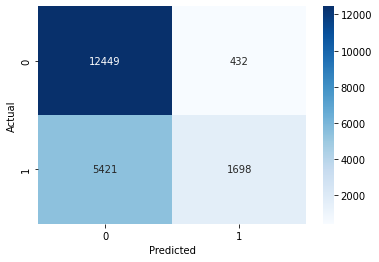

In [82]:
'''
We let the model predict some samples and then show on a confusion matrix plot the results.
All results such as classification report, confusion matrix and plot, are saved into a 
time stamped directory under reports/ 
'''
predictions = predicted
true_labels = actual
cf_matrix = pd.crosstab(y_actu, y_pred)

heatmap = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g', 
                      xticklabels=np.unique(true_labels), 
                      yticklabels=np.unique(true_labels)) 

In [32]:
accuracy = np.sum(np.equal(actual,predicted))/len(actual)

In [ ]:
print("Prediction:",sigmoid.eval(session=sess,feed_dict={X:[[18393., 168., 62., 0.],[10.0, 150., 45., 0.],[18378.,160.,65.,0.]]}))

In [19]:
predicted

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
